## Crop_Recommendation_System

In [1]:
# Importing Libraries and Loading dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
data.sample(5)

N   P   K  temperature   humidity        ph   rainfall       label
1418   82  18  48    29.095883  94.167484  6.159051  26.705813   muskmelon
840     5  65  19    18.280722  68.103654  6.978362  48.802533      lentil
1932  125  60  17    24.143862  84.515913  6.785724  80.361470      cotton
1350   97  25  50    26.220060  80.901270  6.093815  49.085539  watermelon
620    13  47  20    29.217800  87.937242  6.544502  43.138663    mungbean

## Data fields

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree

Celsius humidity - relative humidity in % 

ph - ph value of the soil 

rainfall - rainfall in mm

In [4]:
data.shape

(2200, 8)

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

There are outliers present in the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# To check for duplicates
data.duplicated().sum()

0

No duplicates present

In [9]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
data.columns 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# Exploratory Data Analysis

In [11]:
# Unique Name of the Crops in Dataset
crops = data['label'].unique()
crops.sort()
print ("Total Number of Crops Data: ", len(crops) )
print("\n","-"*20, " List of Crops ", "-"*20)
crops.tolist()

Total Number of Crops Data:  22

 --------------------  List of Crops  --------------------


['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [12]:
# Number of Rows against each Crop
print("Number of Records Against Eash Crop")
print("-"*35)
print(data['label'].value_counts() )

Number of Records Against Eash Crop
-----------------------------------
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


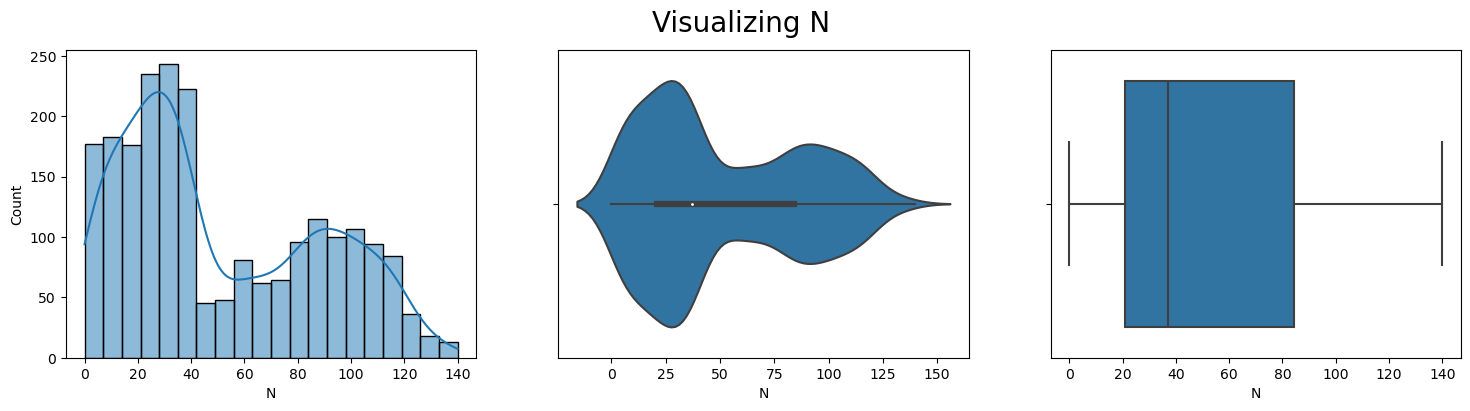

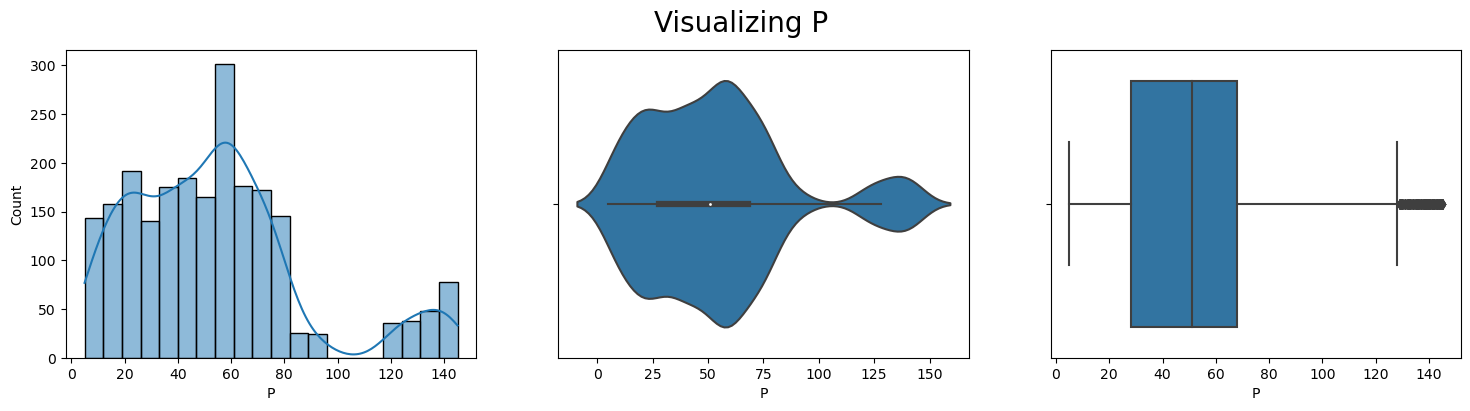

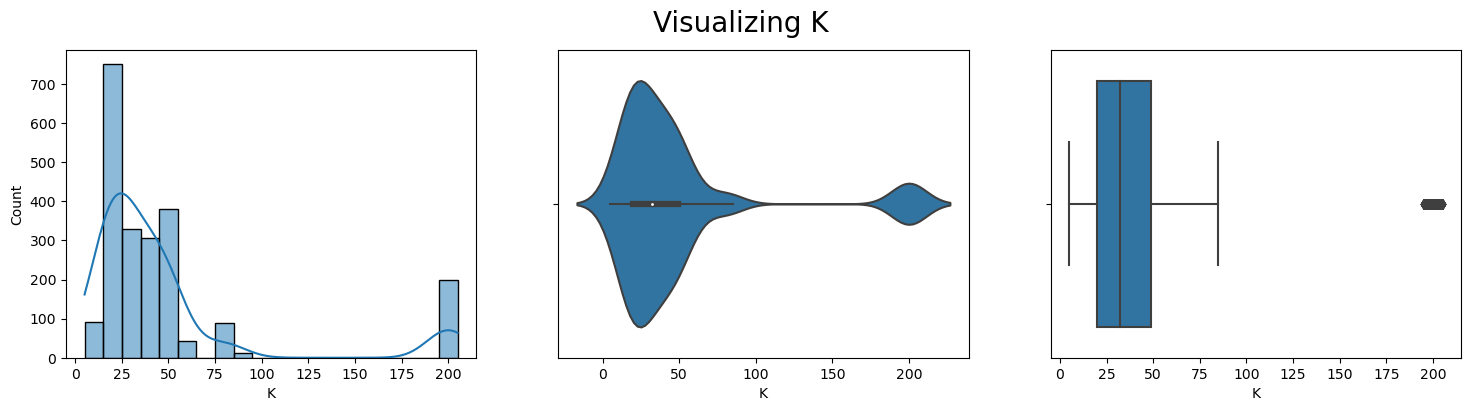

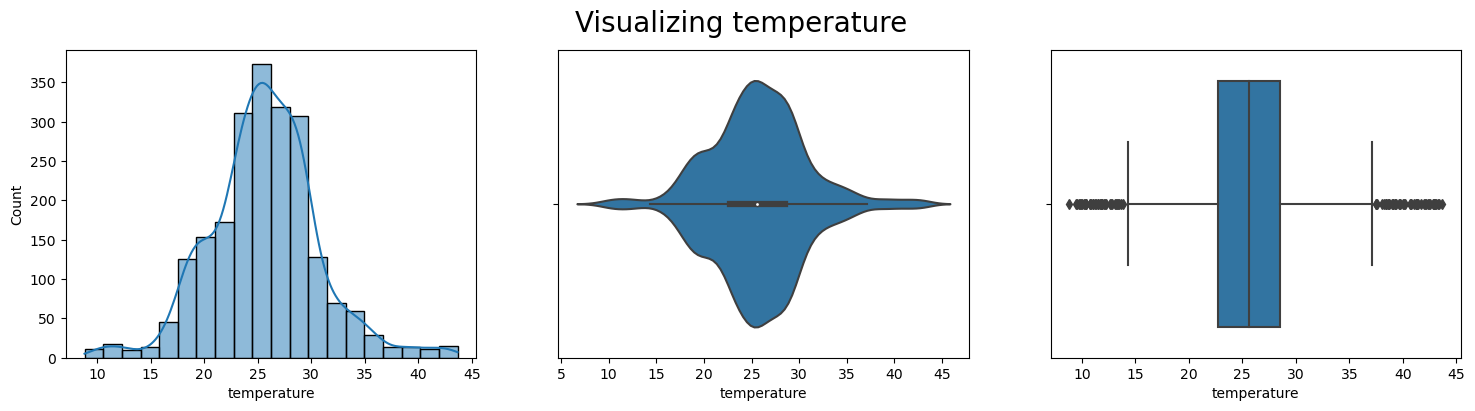

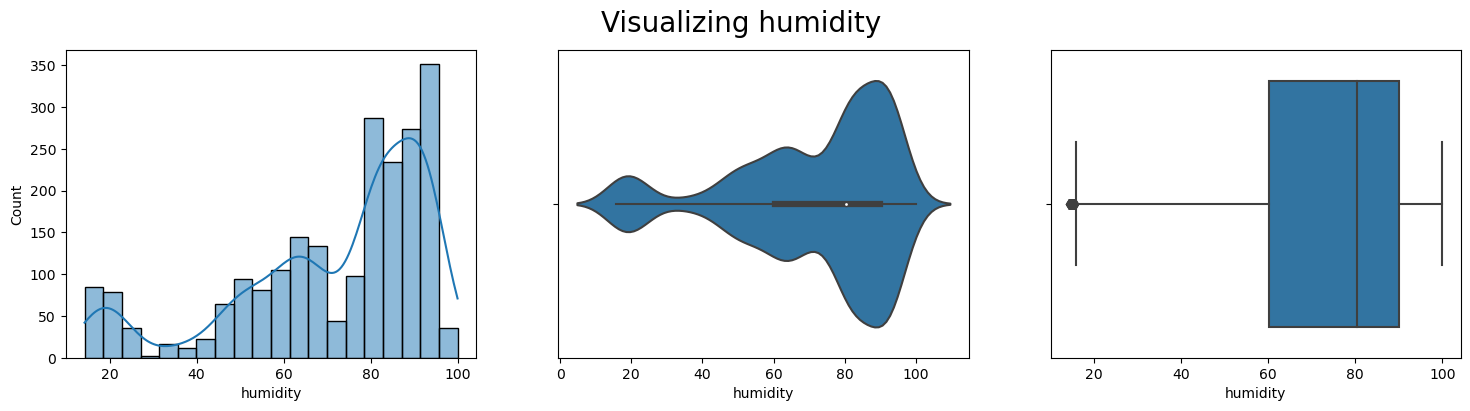

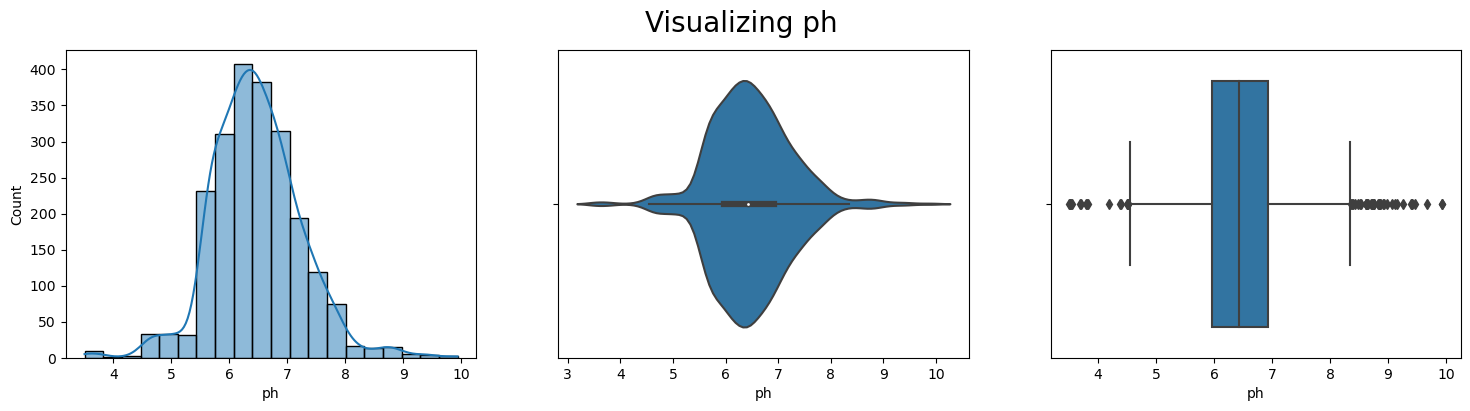

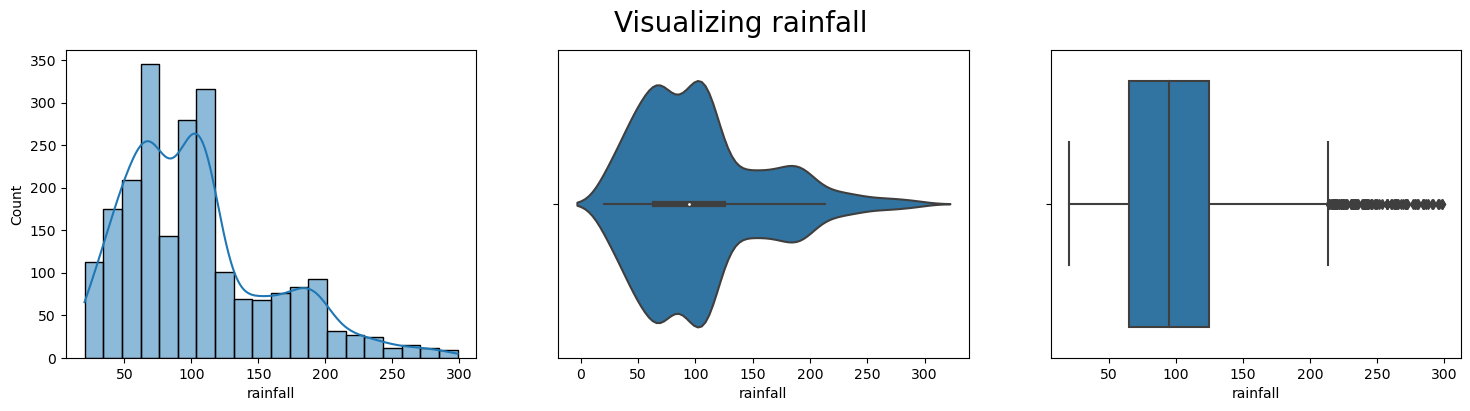

In [13]:
for i in data.columns[:-1]:
    fig,ax = plt.subplots(1,3,figsize = (18,4))
    sns.histplot(data = data, x = i, kde = True, bins = 20, ax = ax[0])
    sns.violinplot(data = data, x = i, ax = ax[1])
    sns.boxplot(data = data, x = i, ax = ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

These graphs confirm that there are outliers present in the data. Also, it helps us to understand the overall distribution of the dataset.

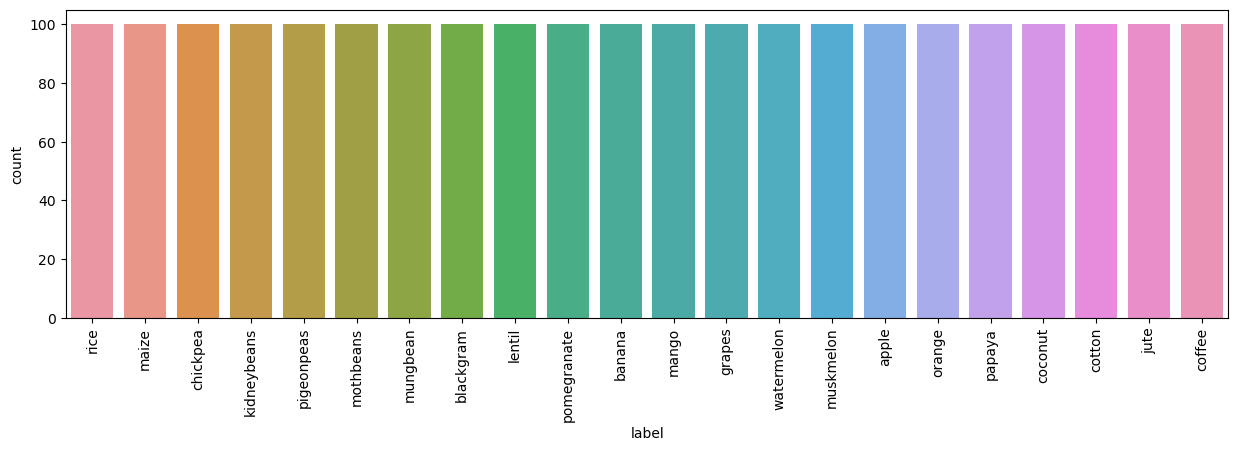

In [14]:
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'label')
plt.xticks(rotation = 'vertical')
plt.show()

The classes are balanced. Accuracy would be a good metric.

In [15]:
# Features
selected_features = data.columns[:-1]
selected_features

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

<AxesSubplot:title={'center':'Features Correlation'}>

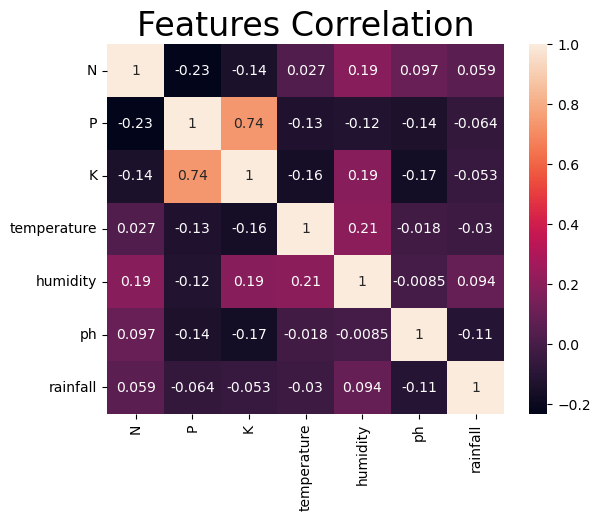

In [16]:
plt.title("Features Correlation", fontsize = 24)
sns.heatmap(data.corr(), annot=True)

A strong positive correlation between Potassium and Phosphorus is observed.

## Features Visualization

## Visualization of each feature of the crops

In [17]:
# Barplot
def crop_relation_visual(feature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize = (15,8))

    ax = sns.barplot(x = "label", y = feature, data = data)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation = 'vertical', fontsize = 14)
    plt.yticks(rotation = 0, fontsize = 14)
    plt.title("Crops Relation with " + str(feature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(feature), fontsize = 18)

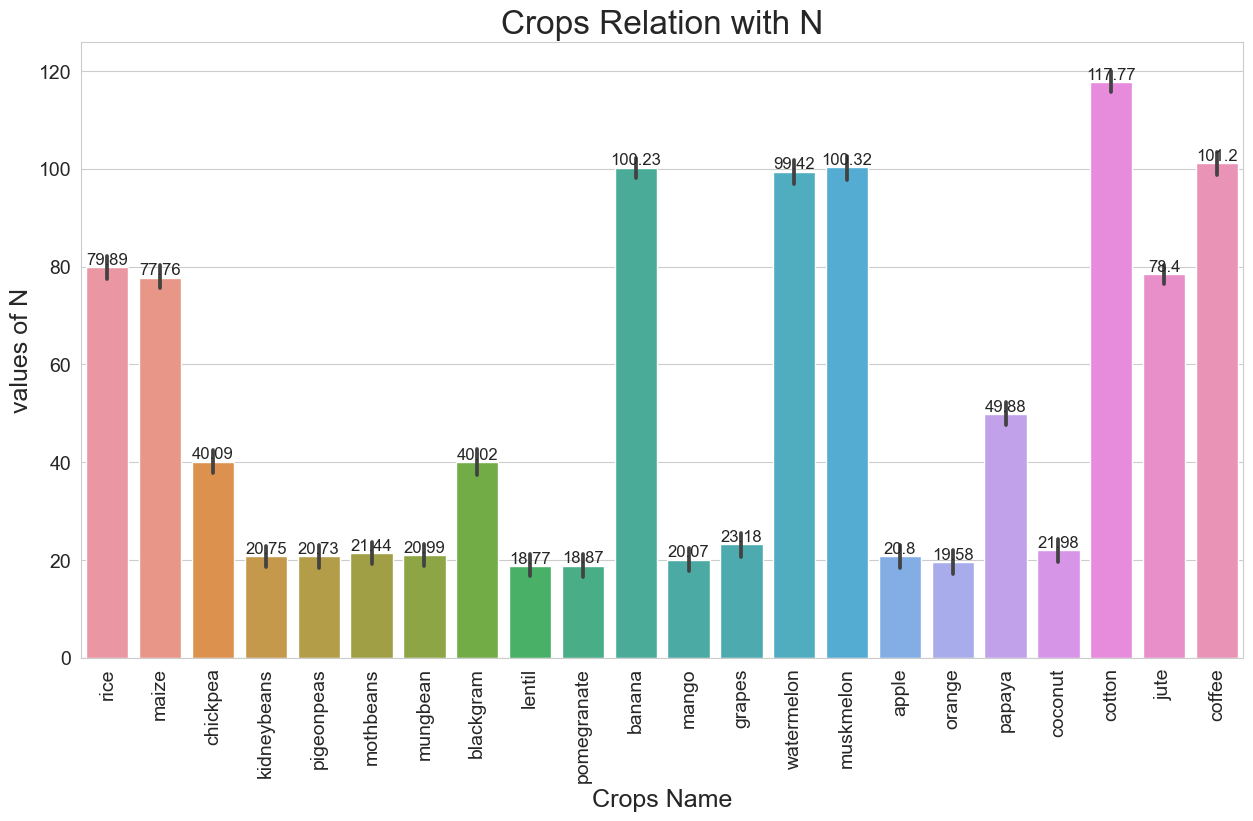

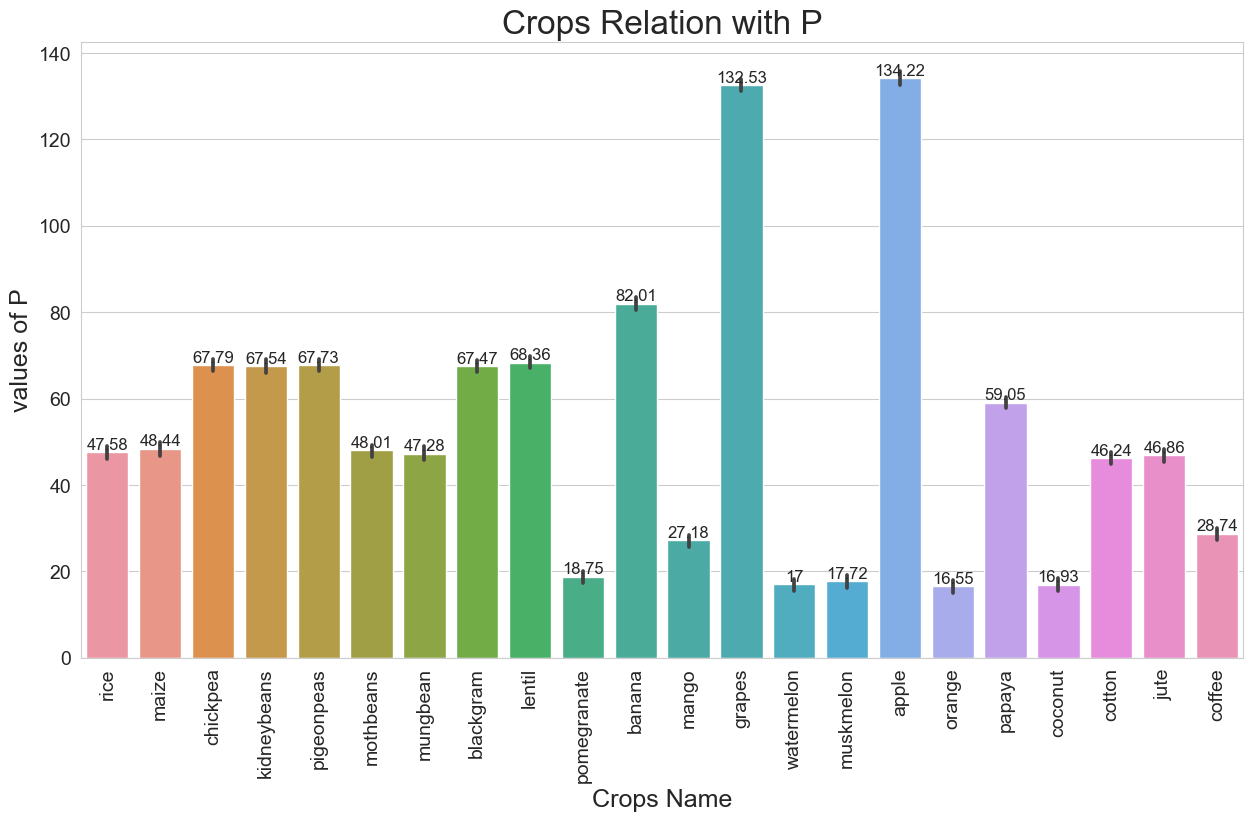

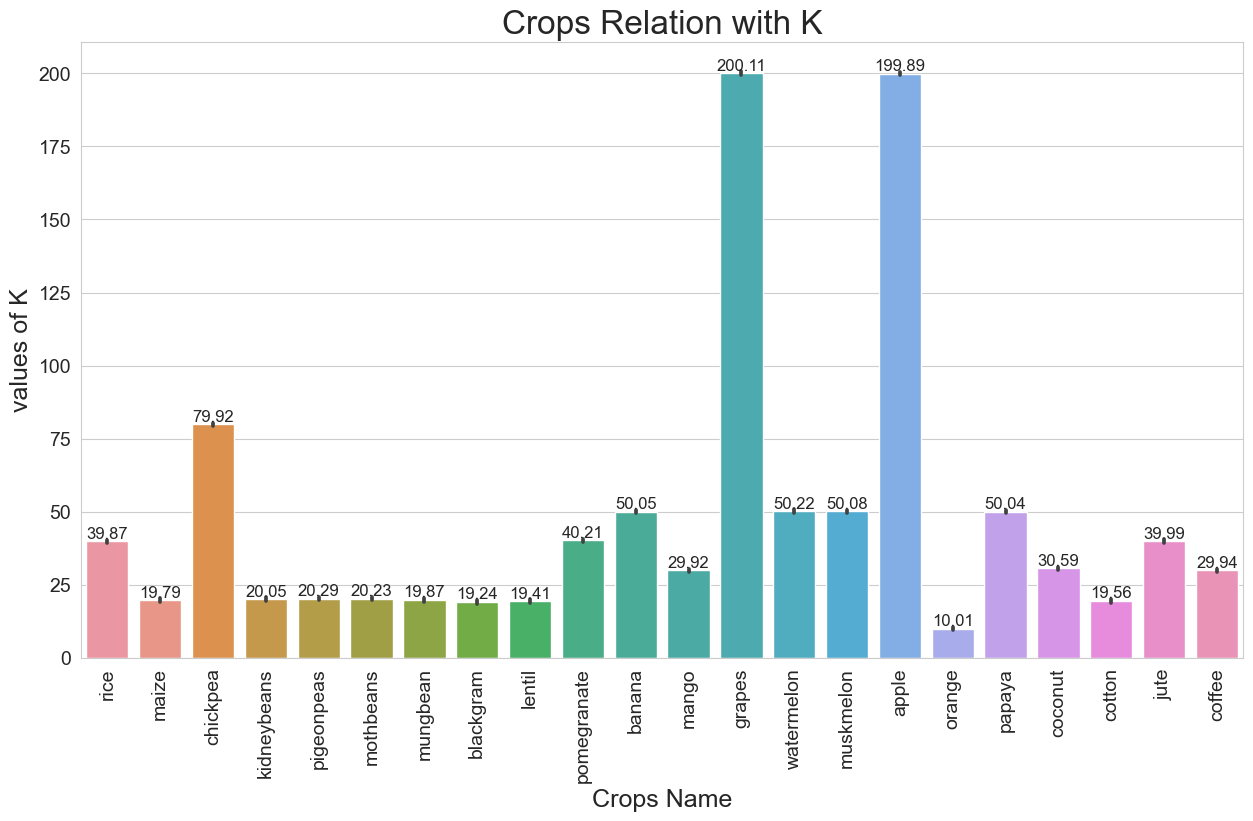

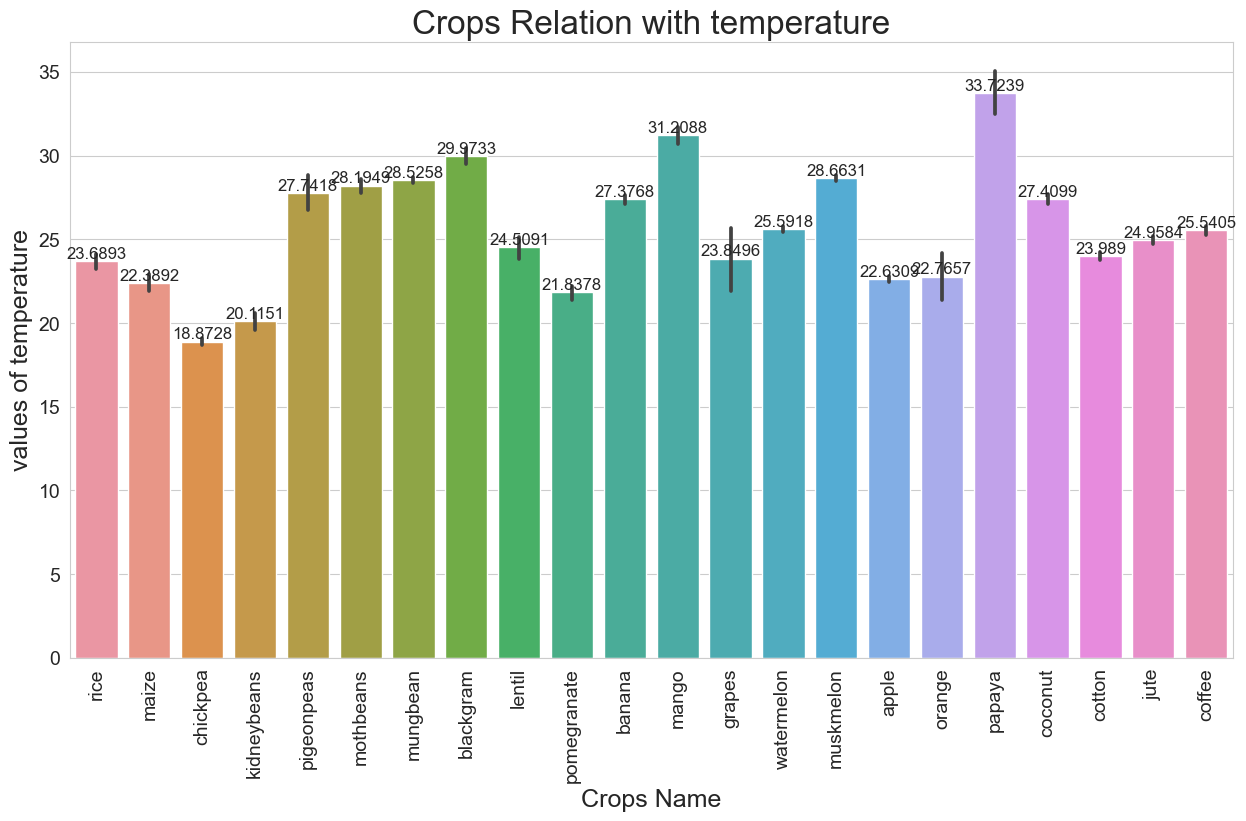

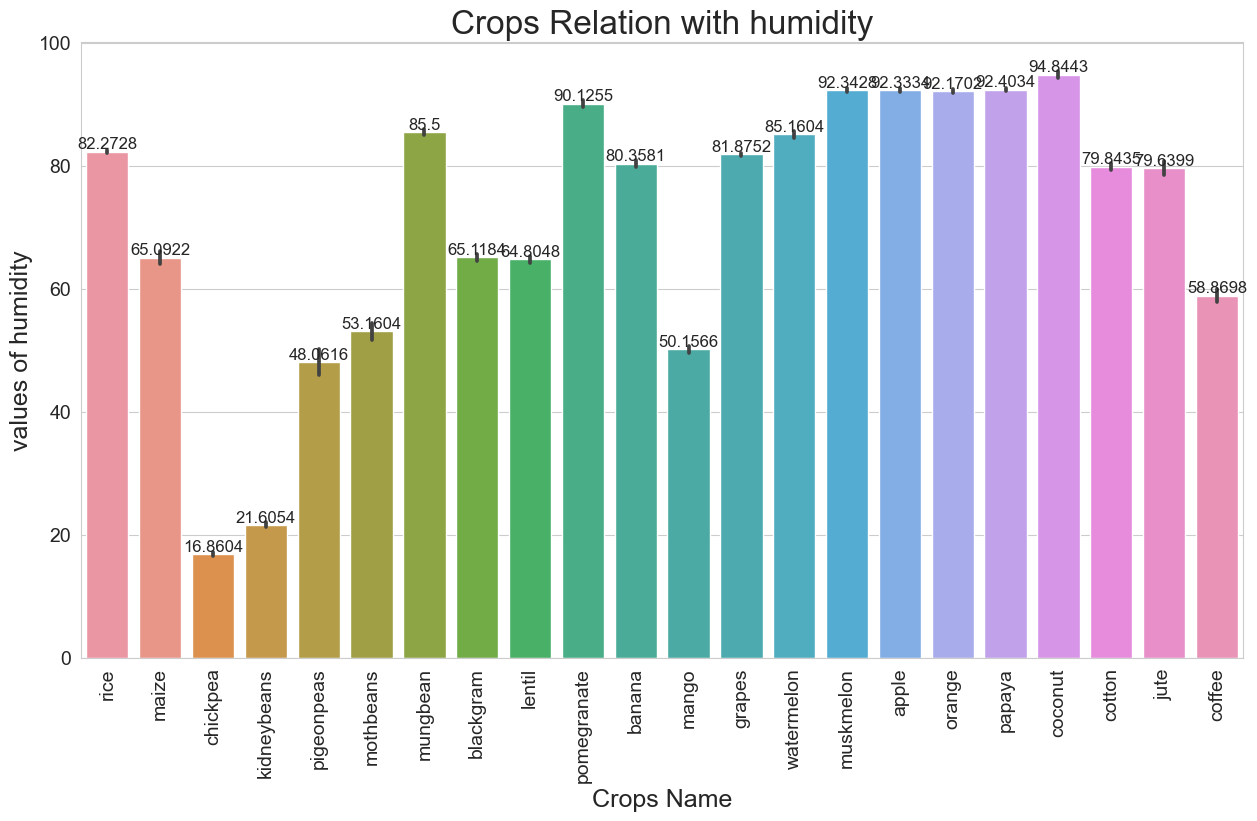

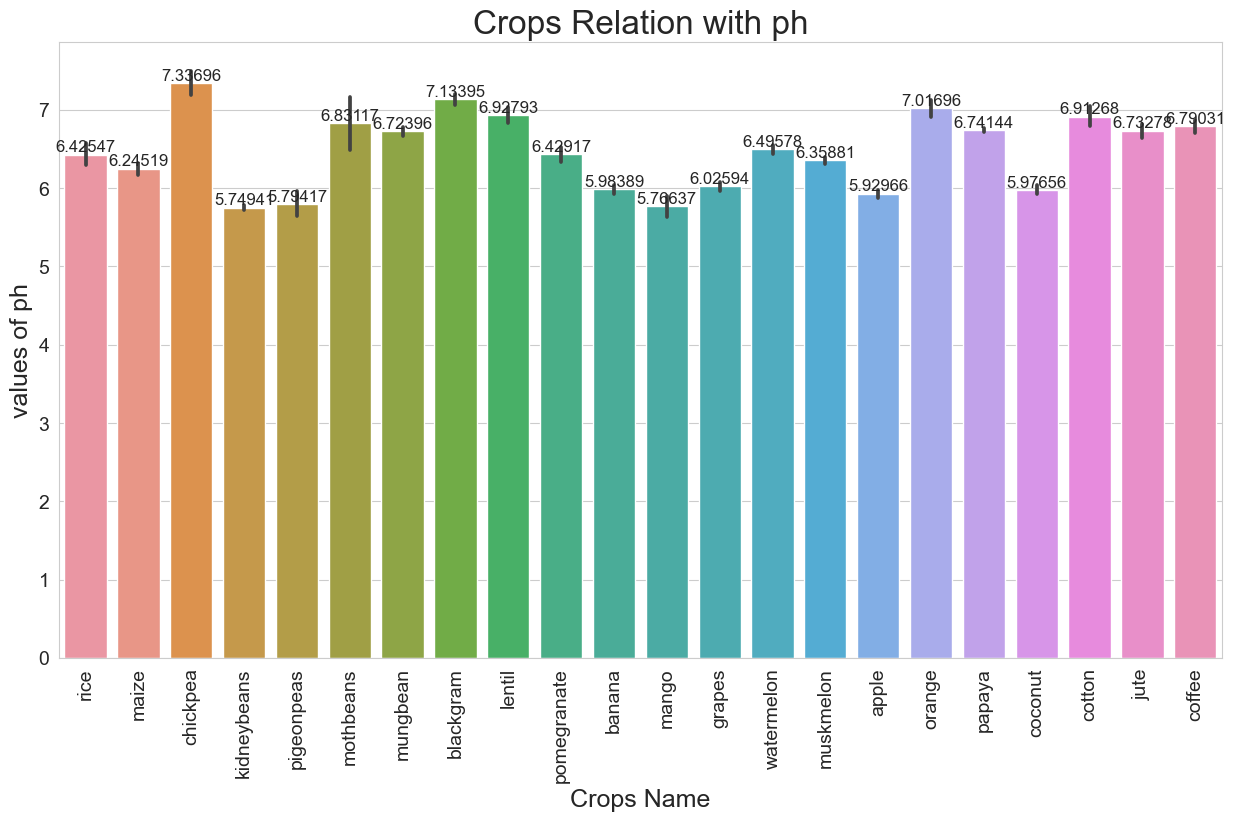

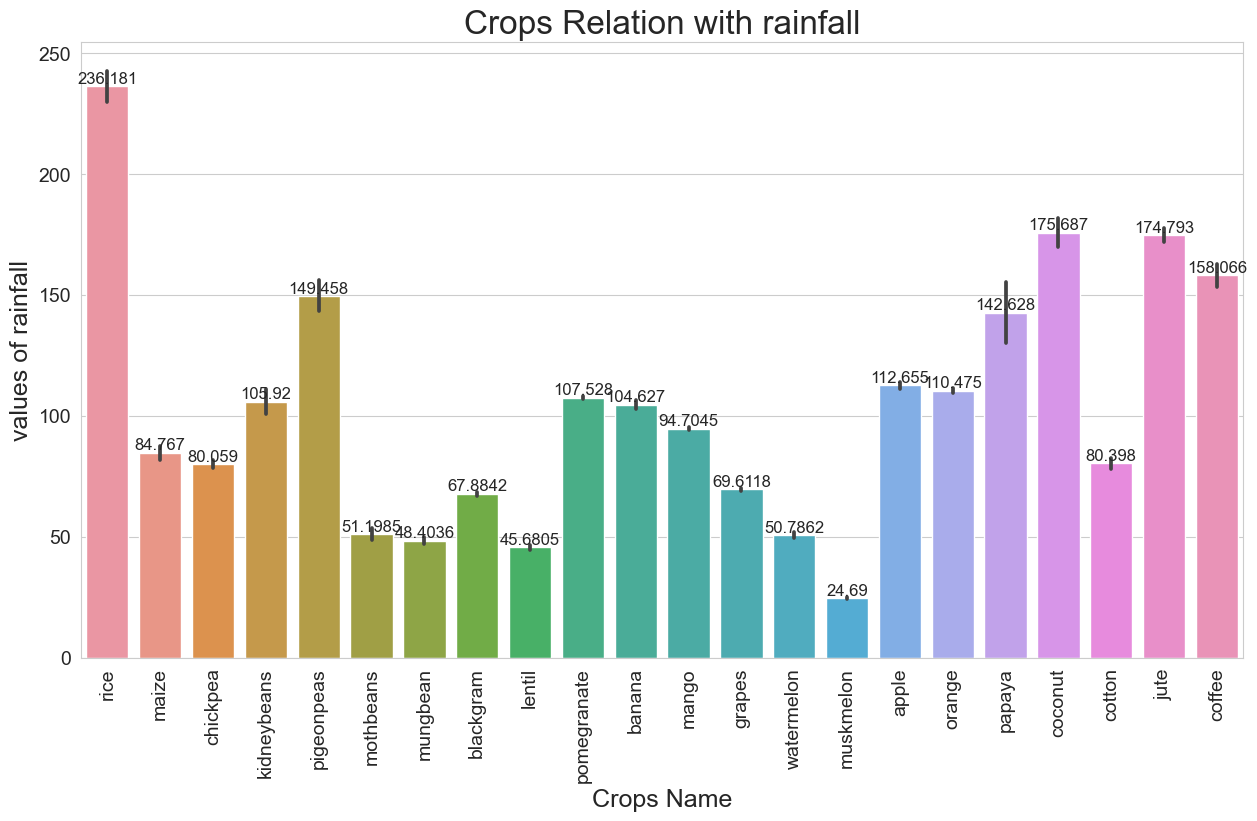

In [18]:
for x in selected_features:
    crop_relation_visual(x)

## Observations:

In [19]:
print("\n", "Cotton requires most Nitrogen.")
print("\n", "Apple requires most Phosphorus.")
print("\n", "Grapes require most Potassium.")
print("\n", "Papaya requires a hot climate.")
print("\n", "Coconut requires a humid climate.")
print("\n", "Chickpea requires high pH in soil.")
print("\n", "Rice requires huge amount of Rainfall.")


 Cotton requires most Nitrogen.

 Apple requires most Phosphorus.

 Grapes require most Potassium.

 Papaya requires a hot climate.

 Coconut requires a humid climate.

 Chickpea requires high pH in soil.

 Rice requires huge amount of Rainfall.


In [20]:
# Boxplot
def crop_boxplot_visual(feature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize = (15,8))
    
    sns.boxplot(x = feature, y = "label", data = data)
    
    plt.xticks(rotation = 'vertical', fontsize = 14)
    plt.title("Crops Relation with " + str(feature), fontsize = 24)
    plt.xlabel("values of " + str(feature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

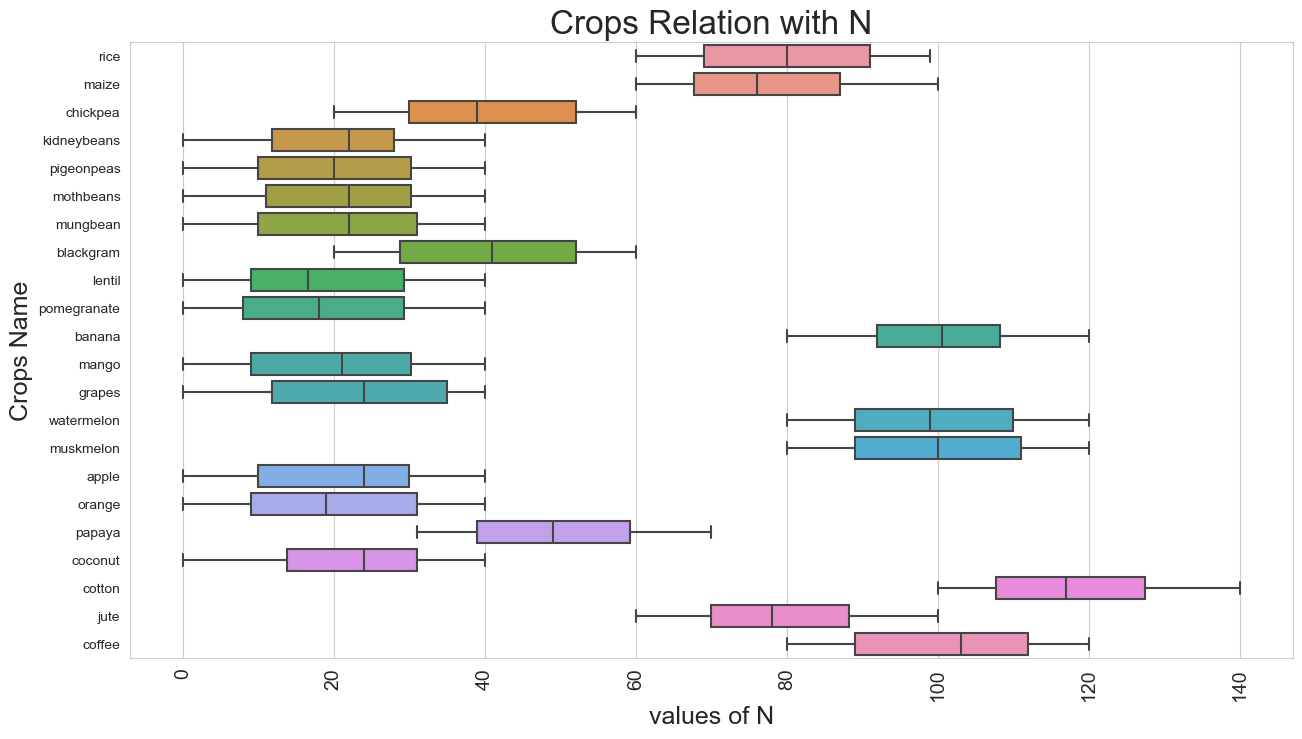

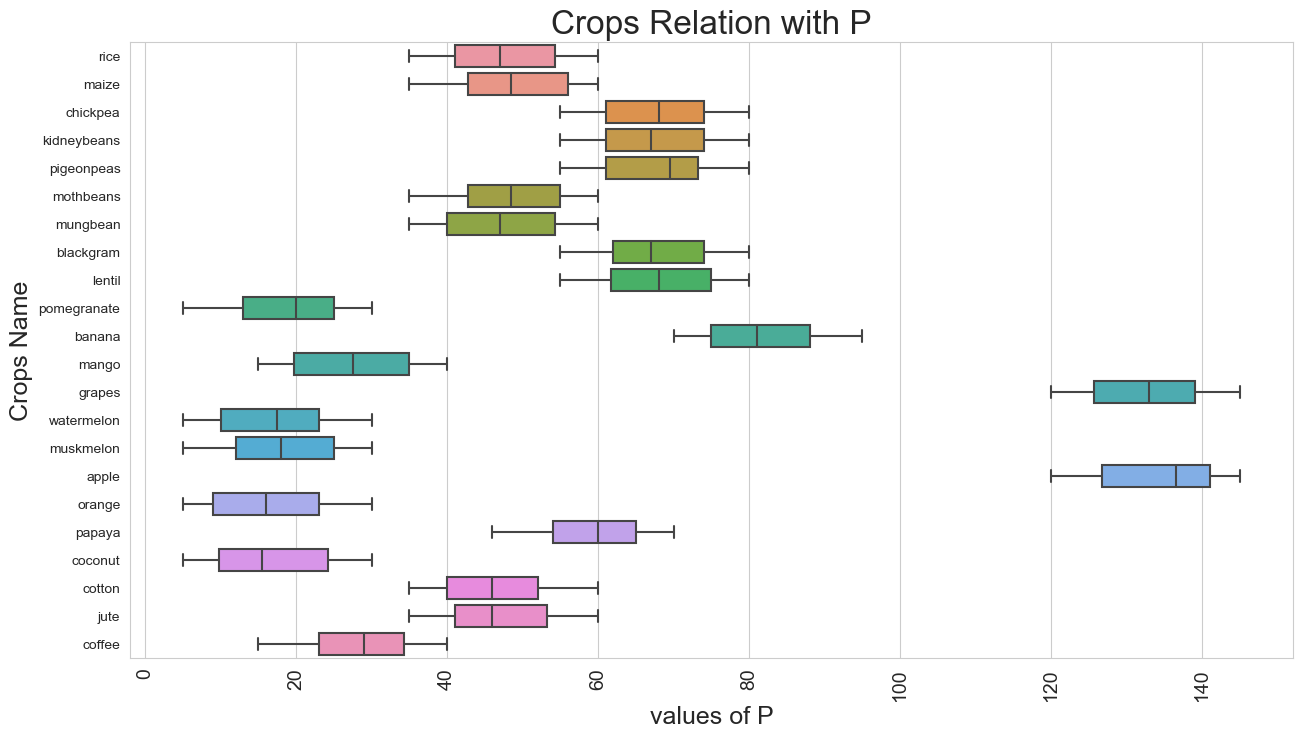

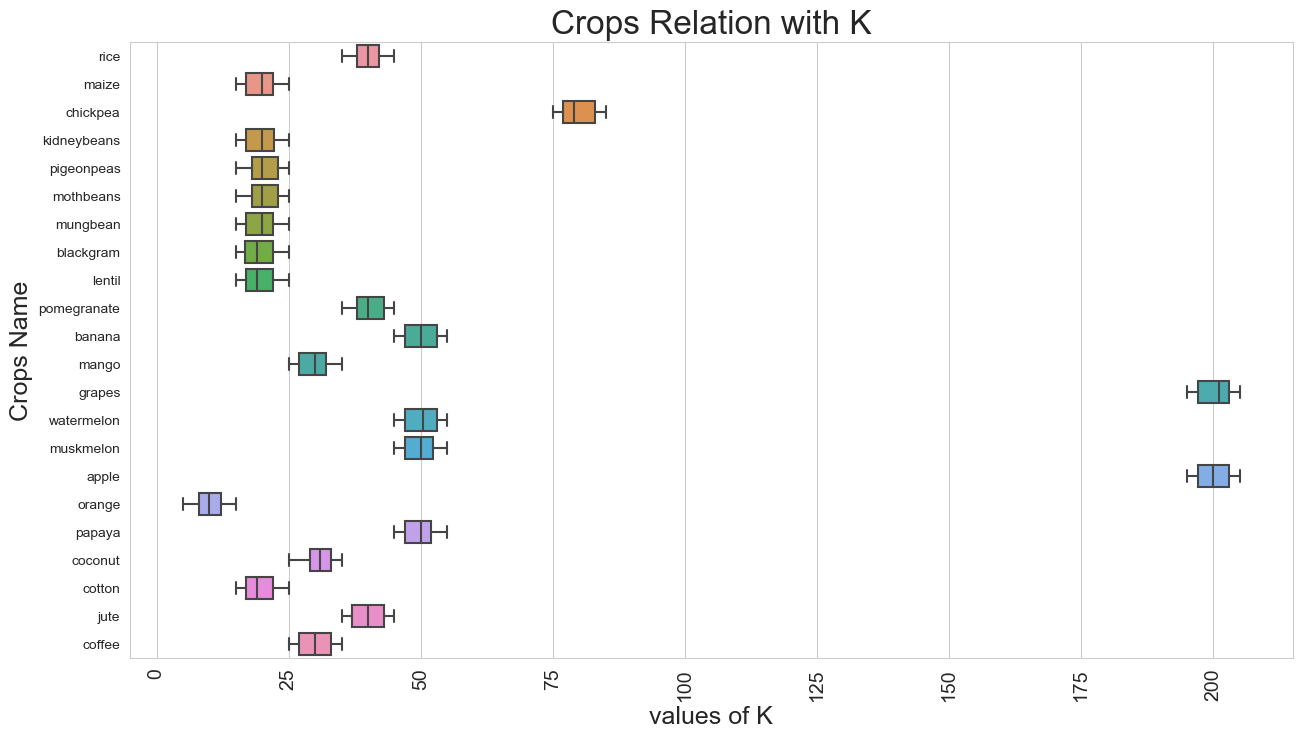

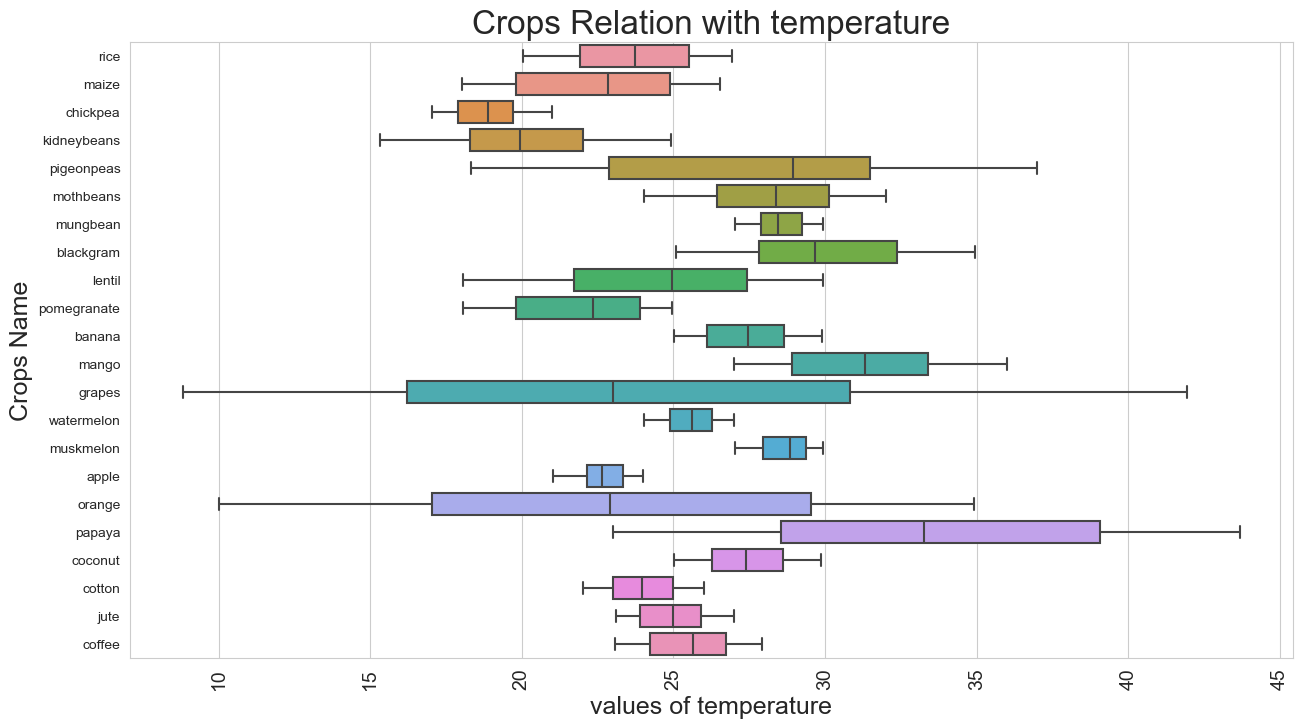

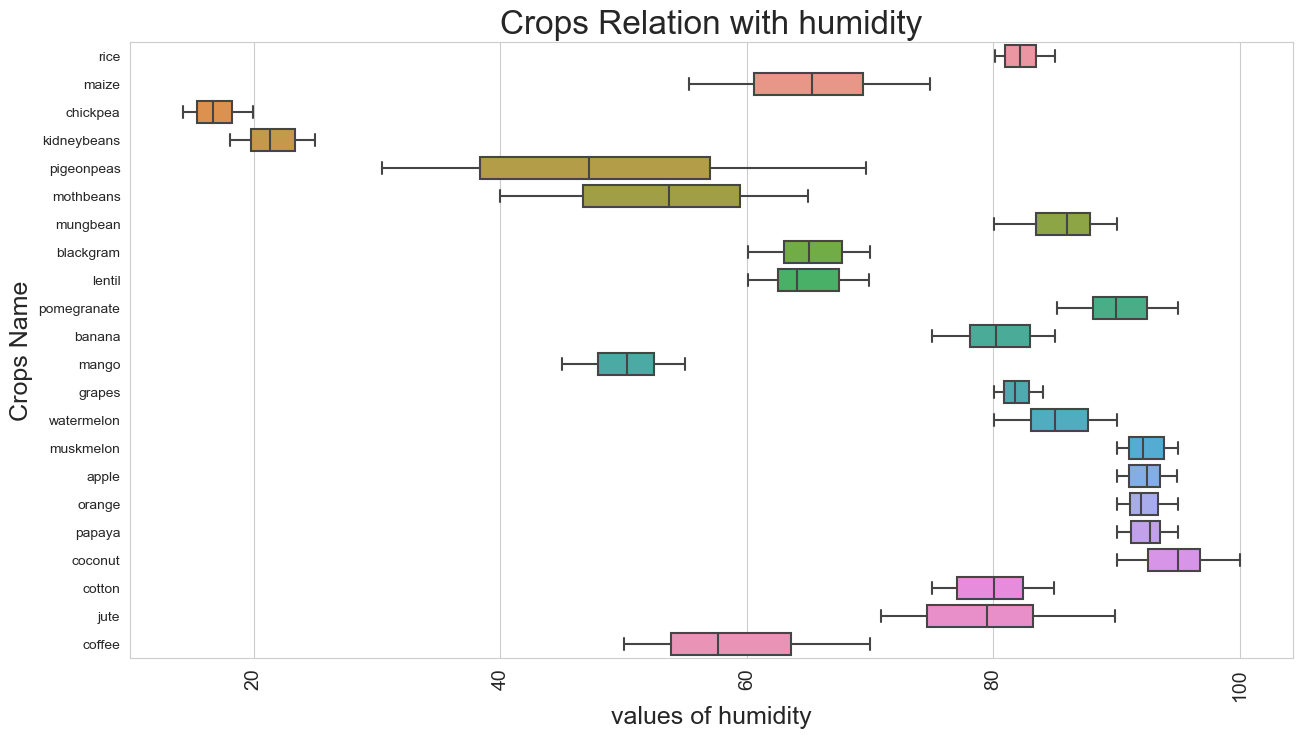

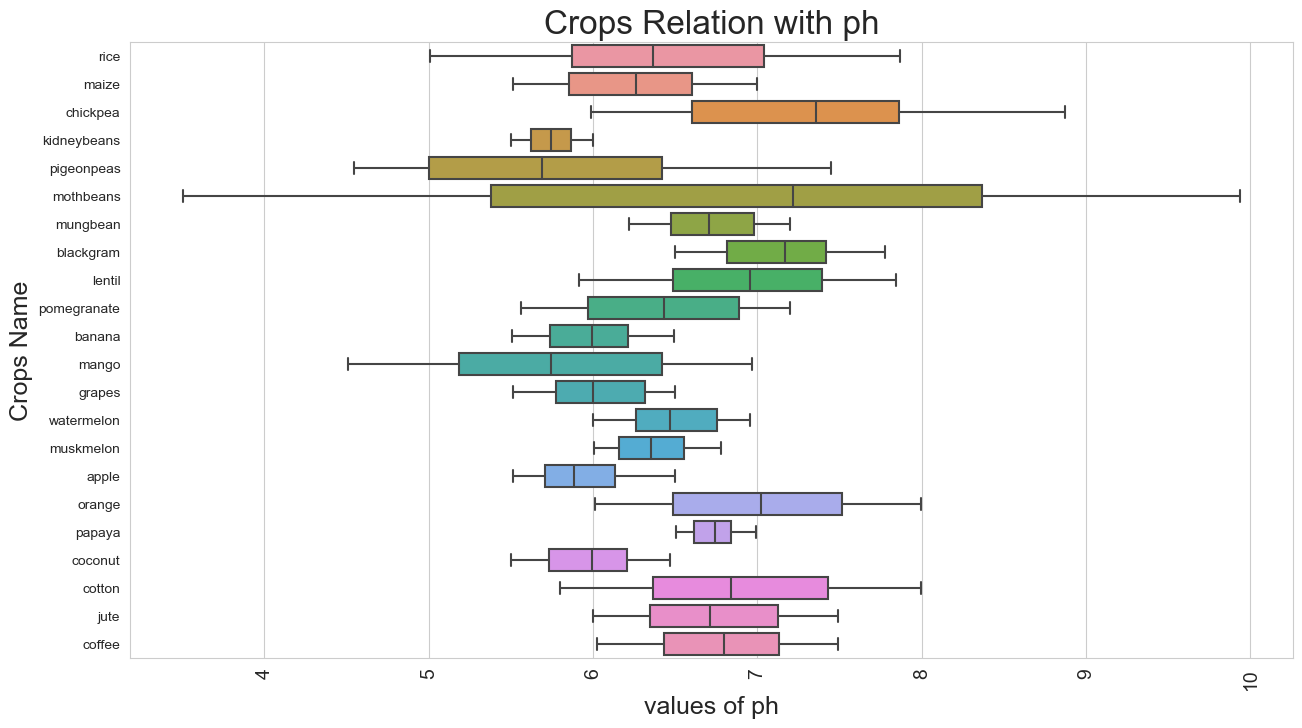

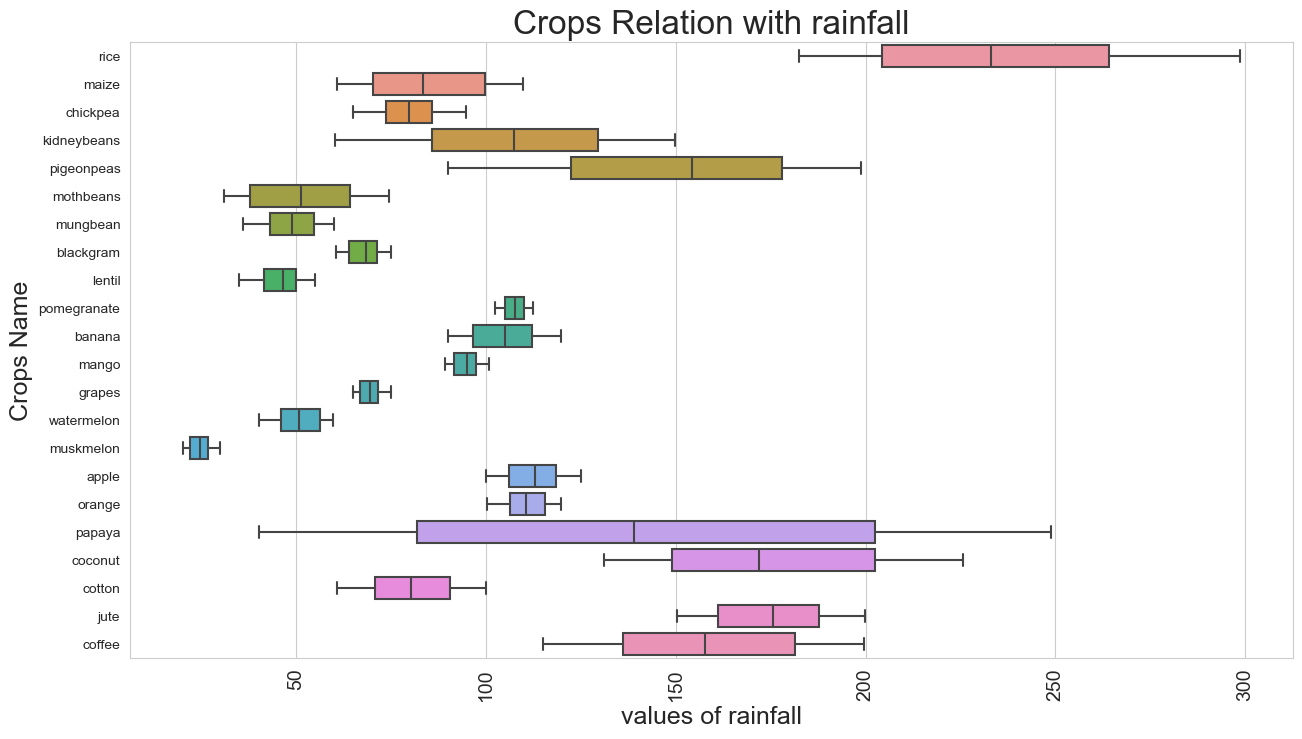

In [21]:
for x in selected_features:
    crop_boxplot_visual(x)

In [22]:
# Line Plot
def crop_lineplot_visual(feature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize = (14, 8))
    
    sns.lineplot(x = "label", y = feature, data = data)

    plt.xticks(rotation = 'vertical', fontsize = 14)
    plt.yticks(rotation = 0, fontsize = 14)
    plt.title("Crops Relation with " + str(feature), fontsize = 24)
    plt.ylabel("values of " + str(feature), fontsize = 18)
    plt.xlabel("Crops Name", fontsize = 18)

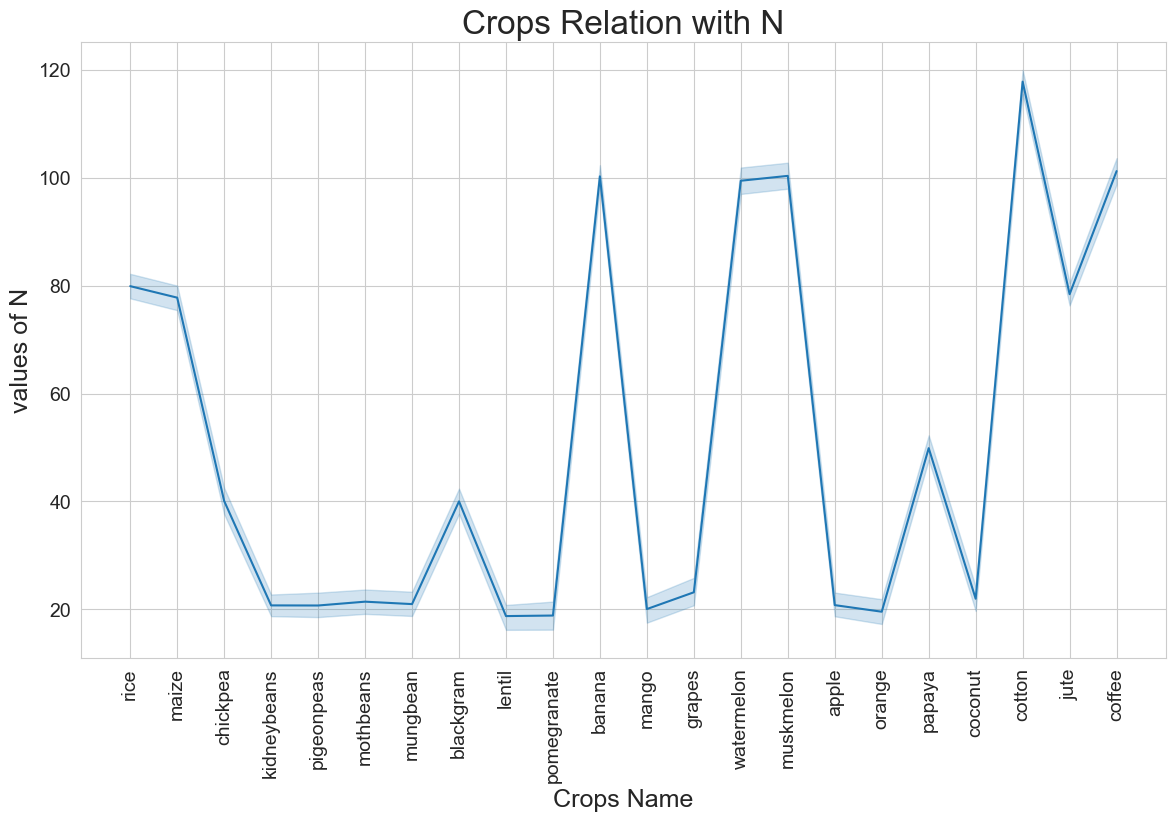

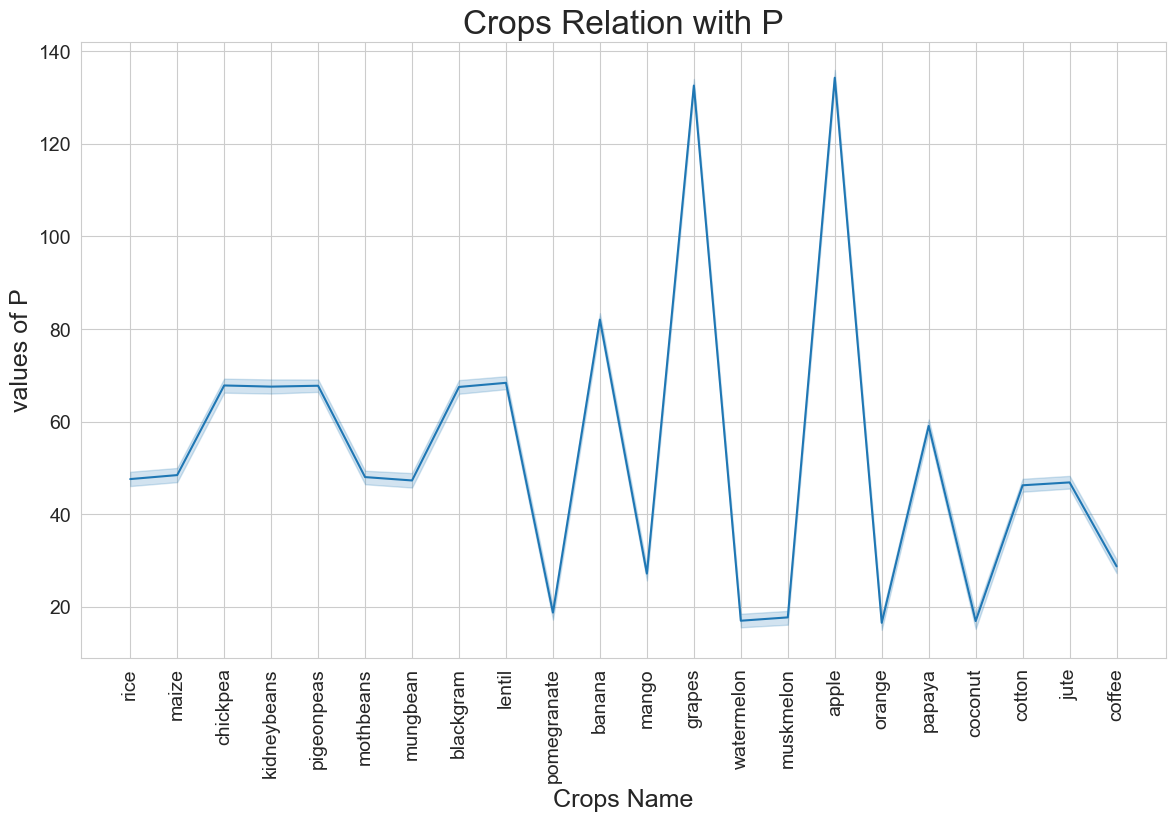

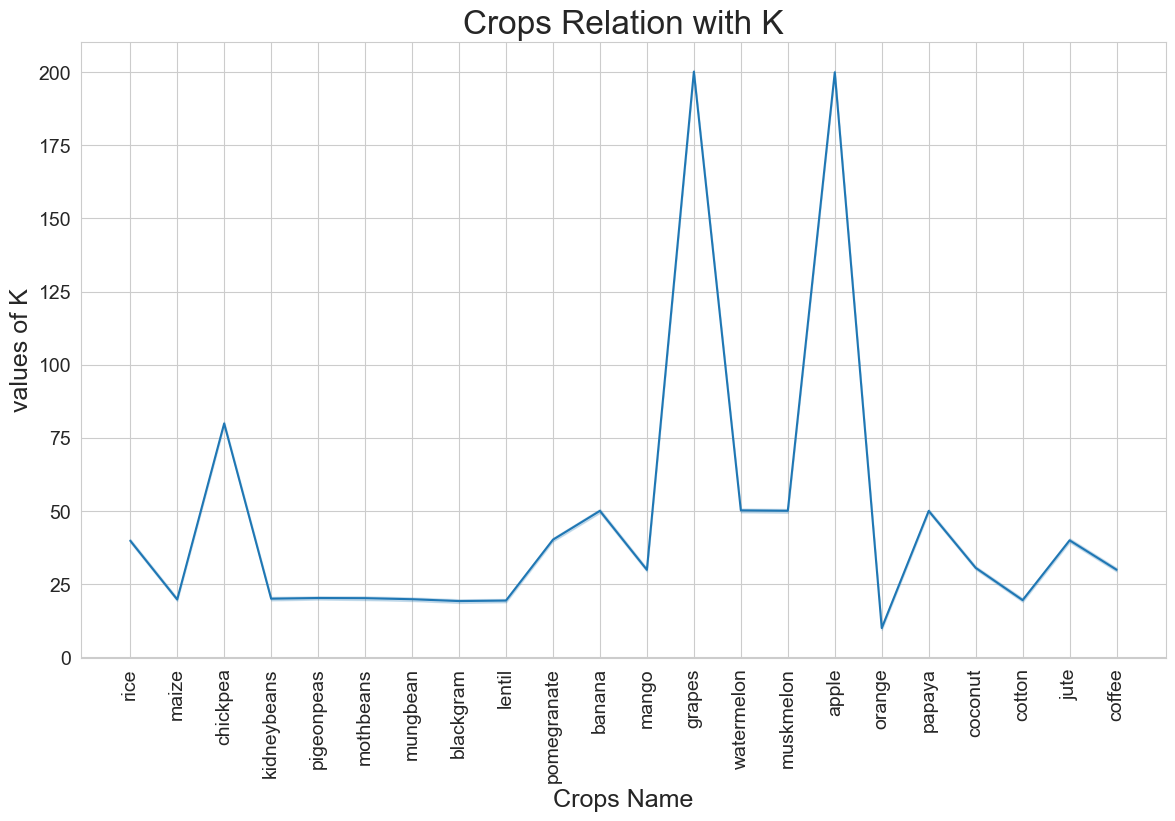

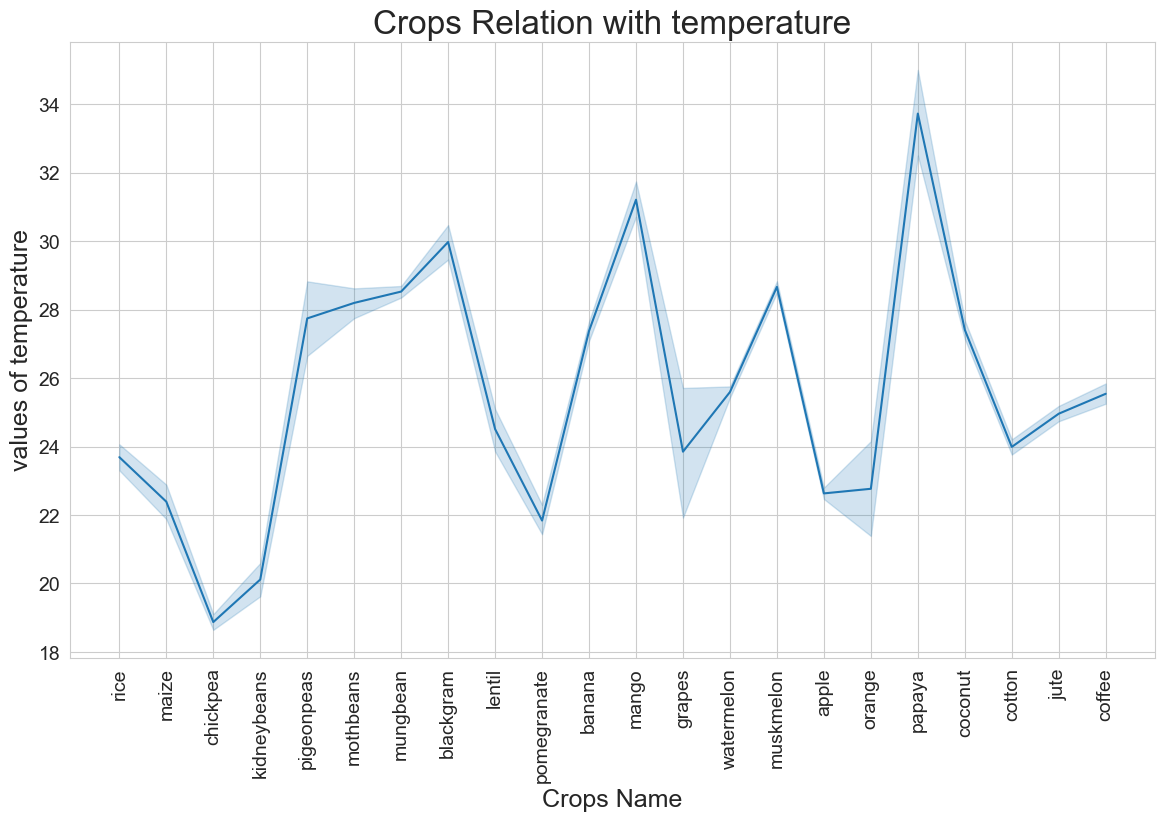

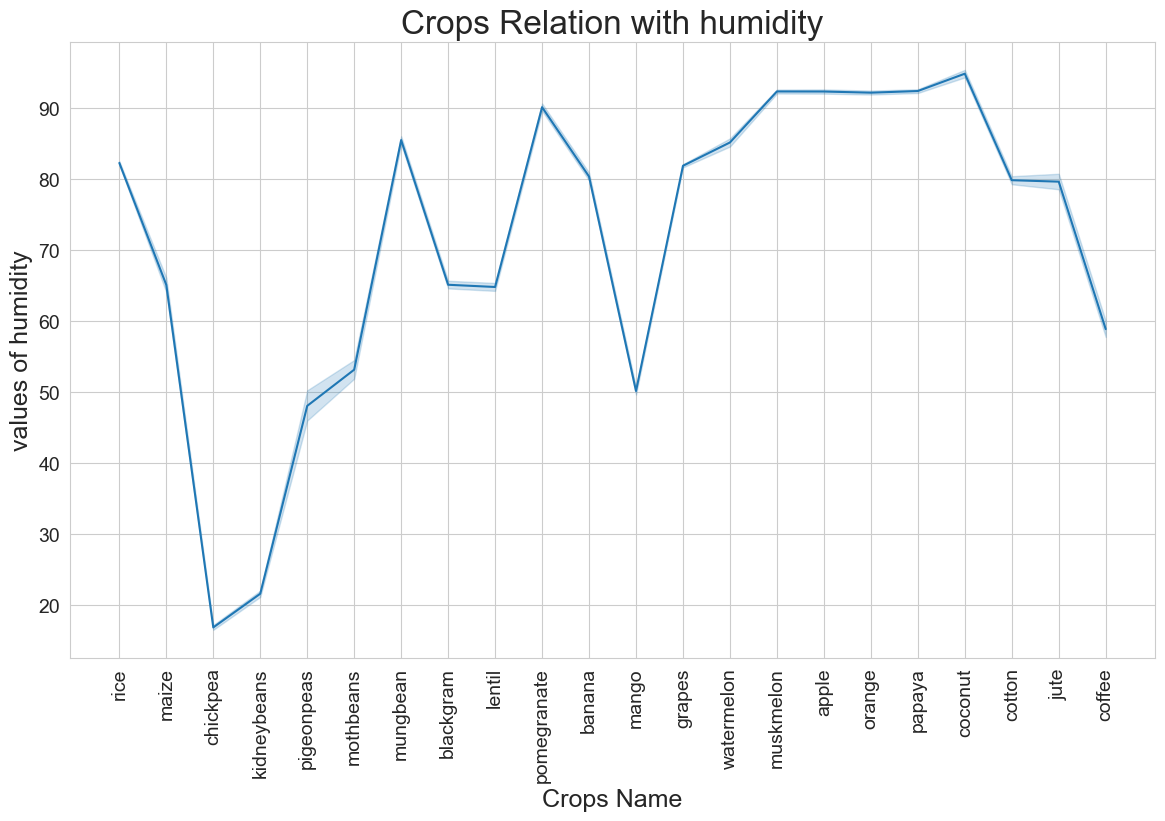

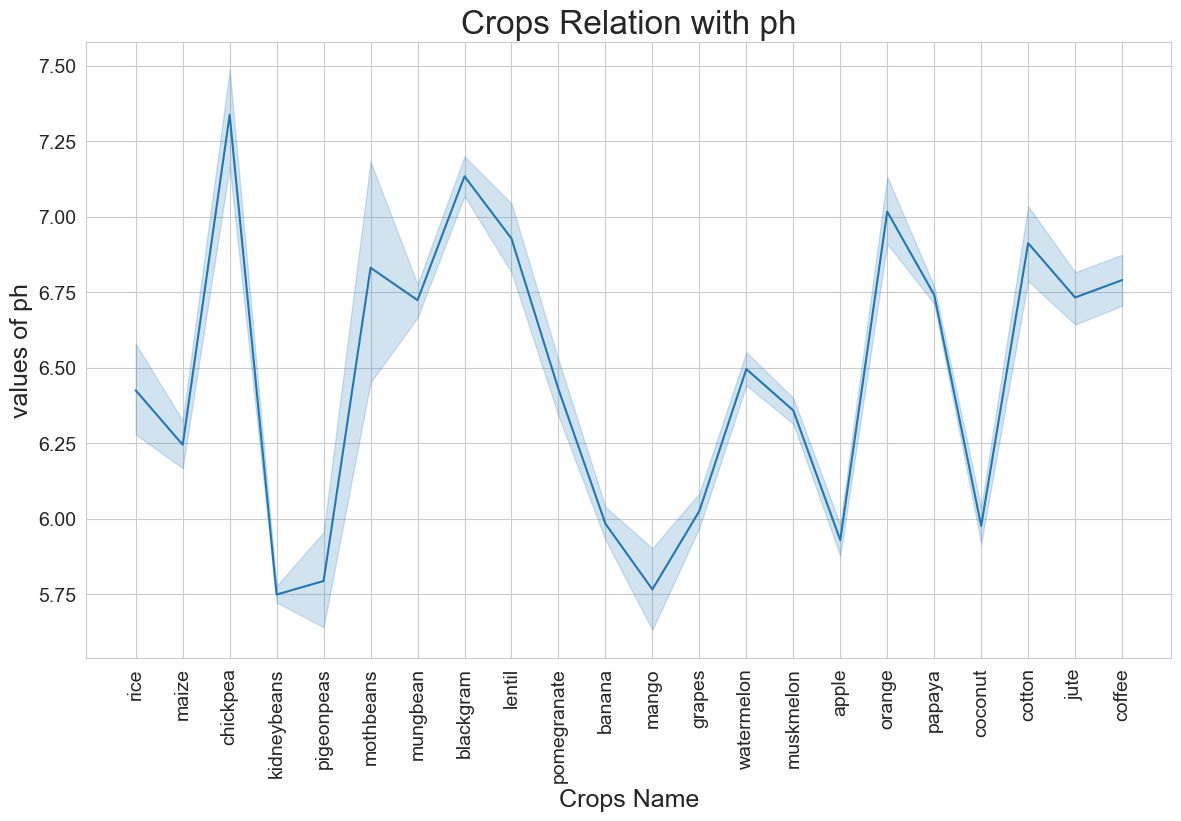

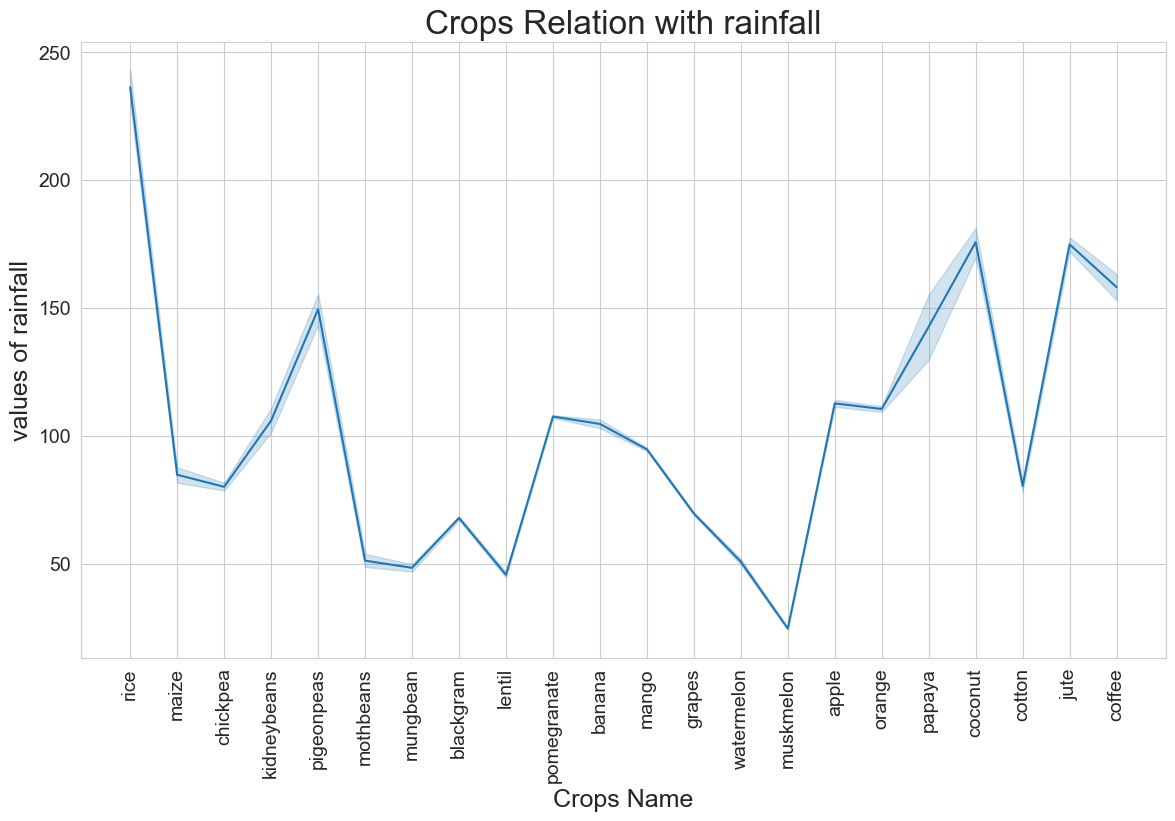

In [23]:
for x in selected_features:
    crop_lineplot_visual(x)

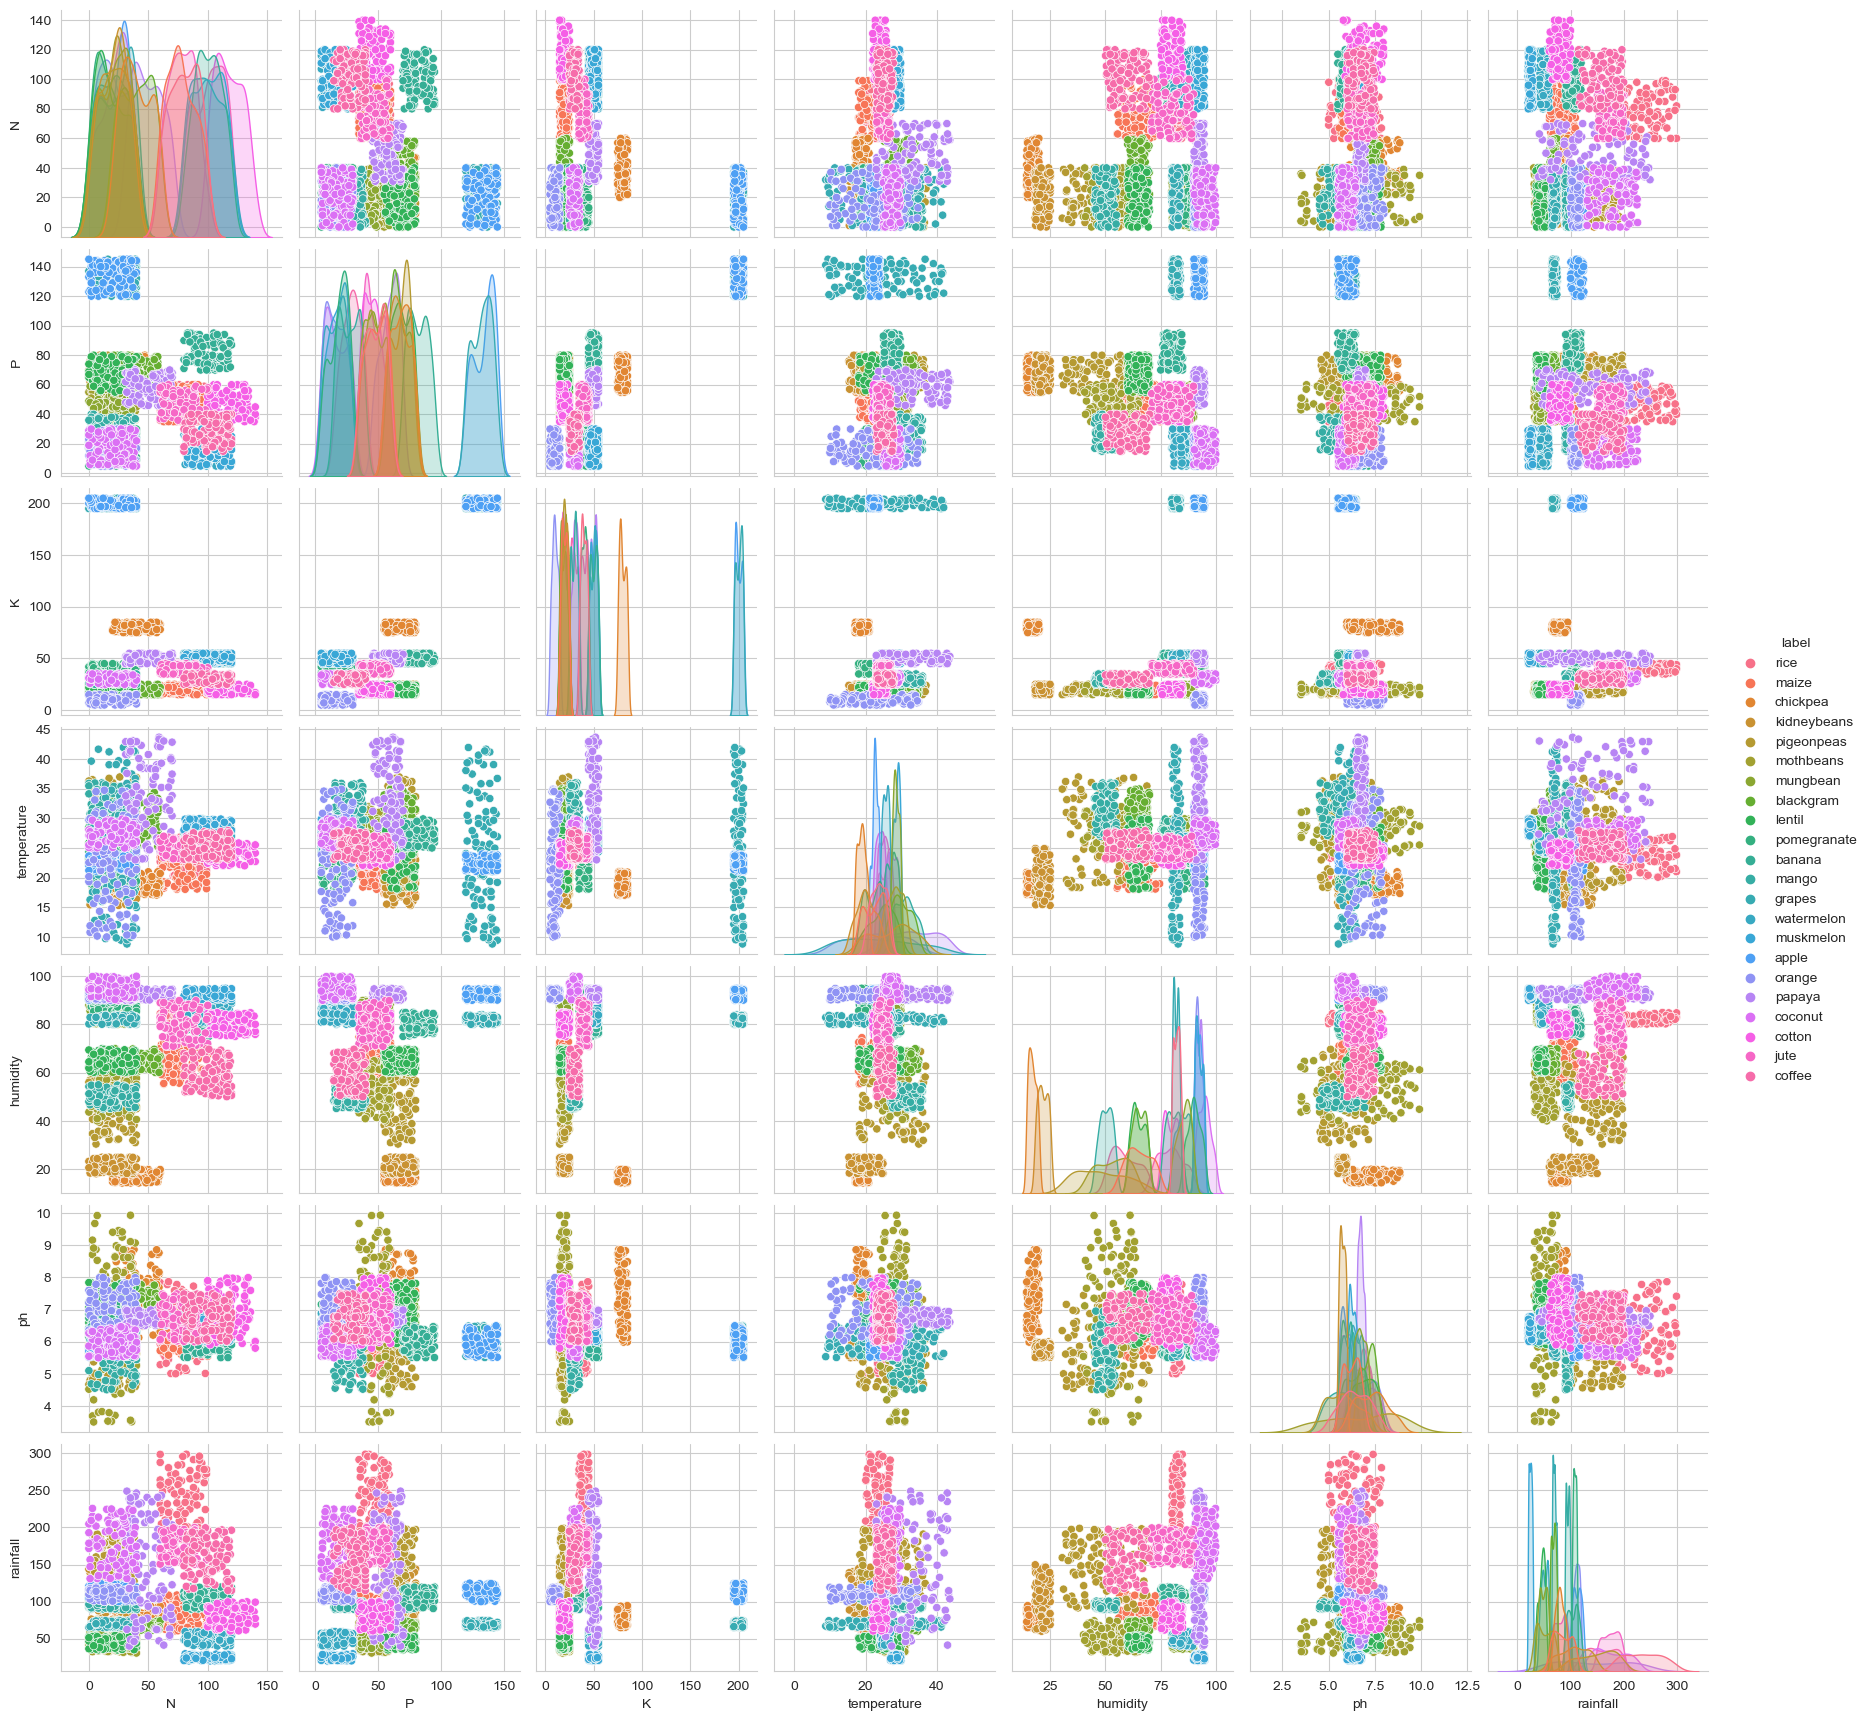

In [24]:
sns.pairplot(data = data,hue = 'label')
plt.show() 

In [25]:
grouped_data = data.groupby(by = 'label').mean().reset_index()

In [26]:
grouped_data

label       N       P       K  temperature   humidity        ph  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   
12        mango   20.07   27.18   29.92    31.208770  50.156573  5.766373   
13    mothbeans   21.44   48.01   20.23    28.194920  53.160418  6.831174   
14     mungbean   20.99   47.28   19.87    28.525775  85.499975  6.723957   
15    muskmelon  100.32   17.72   50.08    28.663066  92.342802  6.358805   
16       orange   19.58   16.55   10.01    22.765725  92.170209  7.016957   
17       papaya   49.88   59.05   50.04    33.723859  92.403388  6.741442   
18   pigeonpeas   20.73   67.73   20.29    27.741762  48.061633  5.794175   
19  pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
20         rice   79.89   47.58   39.87    23.689332  82.272822  6.425471   
21   watermelon   99.42   17.00   50.22    25.591767  85.160375  6.495778   

      rainfall  
0   112.654779  
1   104.626980  
2    67.884151  
3    80.058977  
4   175.686646  
5   158.066295  
6    80.398043  
7    69.611829  
8   174.792798  
9   105.919778  
10   45.680454  
11   84.766988  
12   94.704515  
13   51.198487  
14   48.403601  
15   24.689952  
16  110.474969  
17  142.627839  
18  149.457564  
19  107.528442  
20  236.181114  
21   50.786219

In [27]:
print(f'--------------------------------')
for i in grouped_data.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped_data.sort_values(by = i,ascending = False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most N requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most P requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most K requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple --> 9

In [28]:
print(f'--------------------------------')
for i in grouped_data.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped_data.sort_values(by = i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Least N requiring crops:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 Least P requiring crops:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 Least K requiring crops:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 Least temperature requiring crops:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 Least humidity requiring crops:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.0616330847

## Data Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label_codes'] = encoder.fit_transform(data['label'])
data

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      label_codes  
0              20  
1              20  
2              20  
3              20  
4              20  
...           ...  
2195            5  
2196            5  
2197            5  
2198            5  
2199            5  

[2200 rows x 9 columns]

In [30]:
X = data.drop(['label','label_codes'], axis = 1)
y = data['label_codes']

In [31]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

In [32]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_train.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.371628 -1.072910 -0.673510     0.819481  0.924395  0.937545  0.199440
1 -1.127411  2.084513  3.015261     0.783251  0.426613 -1.153846 -0.643677
2 -1.073140  0.536162 -0.476250    -0.879968 -2.186291 -1.107452  0.694001
3 -0.340487 -0.465713 -0.594606     0.138043 -0.459237 -0.229482 -1.231744
4 -0.883193 -1.255069 -0.791866    -2.563232  0.915842 -0.341959  0.289941

In [33]:
X_train.describe()

N             P             K   temperature      humidity  \
count  1.760000e+03  1.760000e+03  1.760000e+03  1.760000e+03  1.760000e+03   
mean   3.154043e-17  1.796543e-16  1.309559e-16 -2.679675e-16 -1.263509e-16   
std    1.000284e+00  1.000284e+00  1.000284e+00  1.000284e+00  1.000284e+00   
min   -1.371628e+00 -1.467587e+00 -8.510444e-01 -3.304582e+00 -2.566106e+00   
25%   -8.017869e-01 -7.693112e-01 -5.551537e-01 -5.566534e-01 -5.037748e-01   
50%   -3.676218e-01 -7.103511e-02 -3.184412e-01 -1.786872e-02  4.096865e-01   
75%    9.348732e-01  4.450820e-01  1.690164e-02  5.790796e-01  8.301696e-01   
max    2.427316e+00  2.782789e+00  3.094165e+00  3.557067e+00  1.282413e+00   

                 ph      rainfall  
count  1.760000e+03  1.760000e+03  
mean  -3.875688e-16  2.210353e-16  
std    1.000284e+00  1.000284e+00  
min   -3.791597e+00 -1.514094e+00  
25%   -6.613804e-01 -7.075670e-01  
50%   -5.408550e-02 -1.578665e-01  
75%    5.847510e-01  3.663427e-01  
max    4.420128e+00  3.548913e+00

In [34]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_test.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.018869 -0.921110 -0.831318    -0.324465  0.846139  1.138481 -0.013746
1  1.287632  0.779040  0.036628    -0.052809  0.586161 -0.048416 -0.225306
2  2.427316 -0.465713 -0.653784    -0.287878  0.200508 -0.577716 -0.610000
3  0.554979  0.020044 -0.634058    -0.589851 -0.346857 -0.924461 -0.285429
4 -0.286216 -0.951470 -0.831318    -0.211326  0.920030  0.018378  0.227863

## Model Building

1. Accuracy is suitable with balanced dataset when there are an equal number of observations in each class which isn’t common in real-life problems.

2. Precision is important when the cost of false positives is high. 

3. Recall is important when the cost of false negatives is high.

4. F1 score considers both the precision and recall.

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)


In [36]:
lm_pred1 = lm.predict(X_train)

In [37]:
MSE_lm1 = mean_squared_error(y_train, lm_pred1)
MSE_lm1

28.249894268635114

In [38]:
lm_pred = lm.predict(X_test)

In [39]:
MSE_lm = mean_squared_error(y_test, lm_pred)
MSE_lm

28.536184897812614

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [41]:
def score(model, title = "Default"):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
# print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

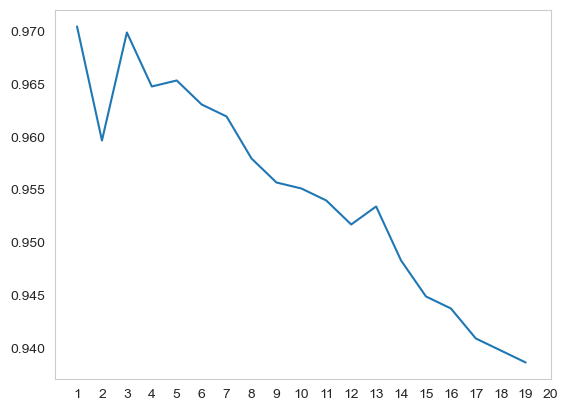

In [42]:
# KNeighbors Classifier

knn_scores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train, cv = 5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.grid()

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       0.95      1.00      0.98        20
          10       0.90      0.95      0.93        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.94      0.85      0.89        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

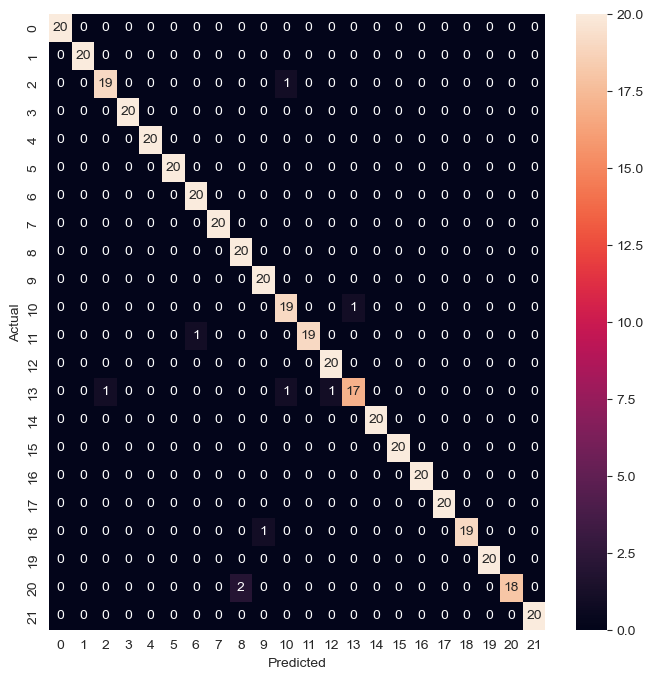

In [43]:
# KNeighbours classifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_knn, annot =  True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))
score(knn, "KNeighborsClassifier")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.87      1.00      0.93        20
           9       1.00      1.00      1.00        20
          10       0.95      1.00      0.98        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

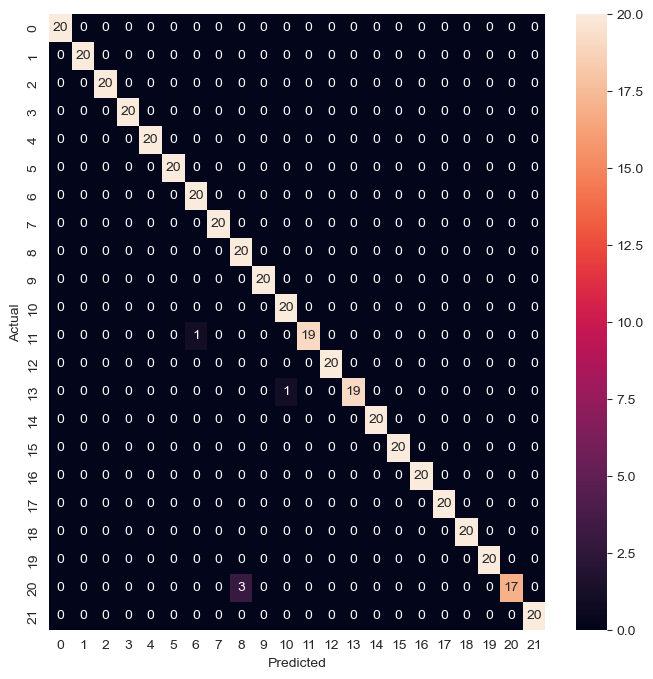

In [44]:
# Support Vector classifier

param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
svc = RandomizedSearchCV(SVC(), param_grid, cv=5)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
confusion_svc = confusion_matrix(y_test,svc.predict(X_test))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_svc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
score(svc, "Support Vector Classifier")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.87      1.00      0.93        20
           9       1.00      1.00      1.00        20
          10       0.95      0.95      0.95        20
          11       1.00      0.90      0.95        20
          12       1.00      1.00      1.00        20
          13       0.95      0.95      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

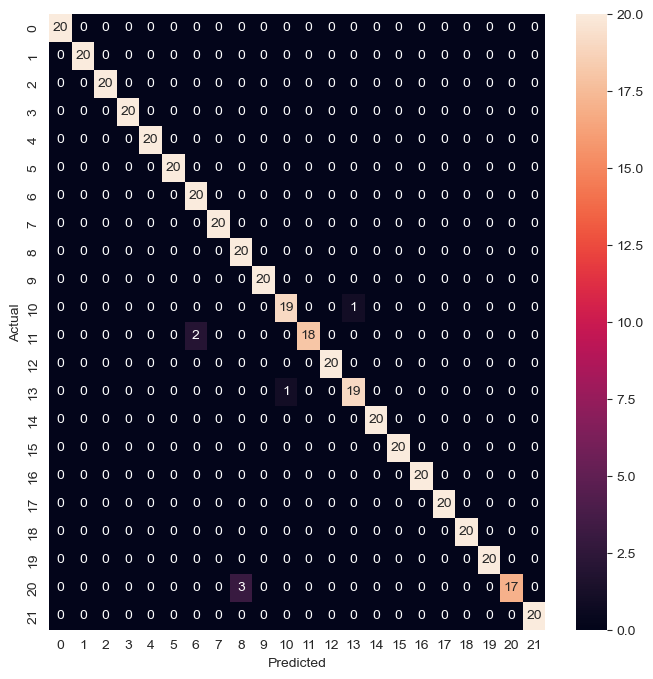

In [45]:
# Logistic Regression

import warnings 
warnings.filterwarnings('ignore')
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log = RandomizedSearchCV(LogisticRegression(solver = 'lbfgs'), param_grid, cv = 5)
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)
confusion_log = confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_log, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
score(log, "Logistic Regression")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

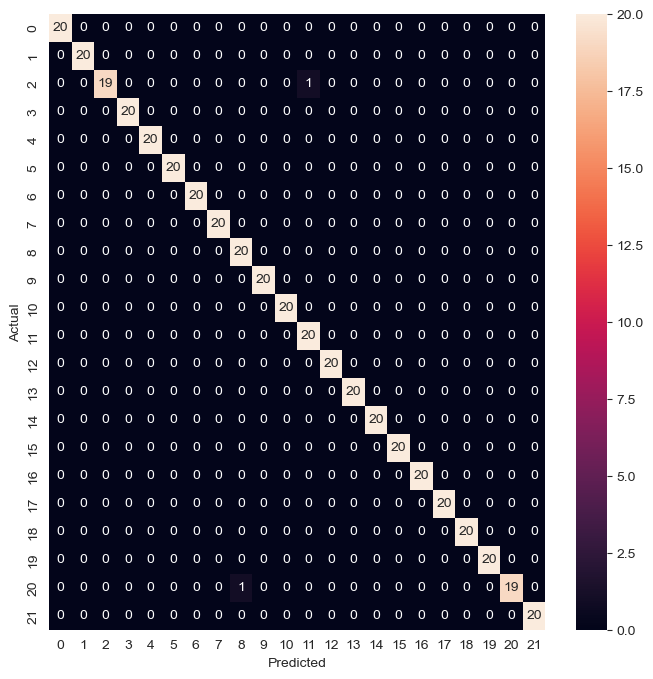

In [46]:
# Random Forest Classifier

param_grid = {'n_estimators': [50, 75,100, 150, 200,300]}
rcv = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5)
rcv.fit(X_train,y_train)
y_pred_rcv = rcv.predict(X_test)
confusion_rcv = confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_rcv, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
score(rcv, "Random Forest Classifier")

In [47]:
!pip install lightgbm

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       0.95      1.00      0.98        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Accuracy for Light GBM Classifier : 0.98864 



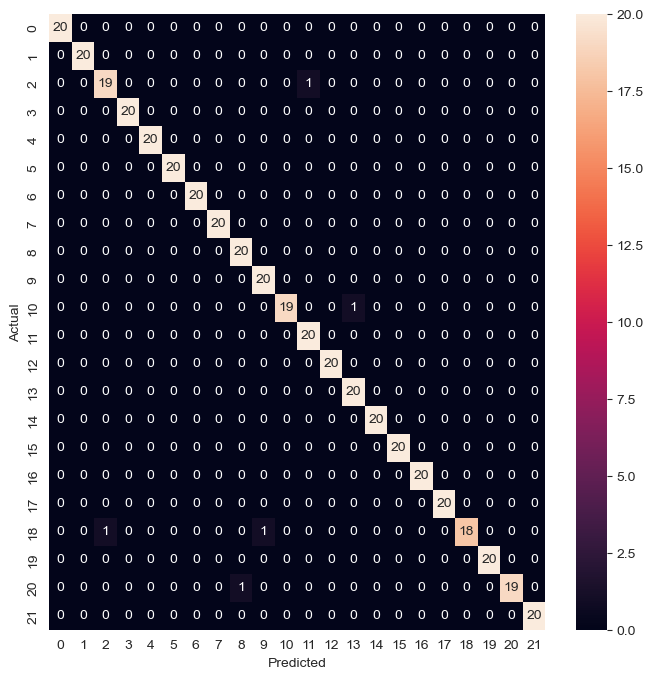

In [57]:
# LGBM classifier


import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred_lgb = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred_lgb)
plt.figure(figsize = (8,8))
sns.heatmap(confusion, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_lgb))
score(clf, "Light GBM Classifier")

In [58]:
# view accuracy
accuracy = accuracy_score(y_pred_lgb, y_test)
print('LightGBM Model accuracy score: {0:0.5f}'.format(accuracy_score(y_test, y_pred_lgb)))

LightGBM Model accuracy score: 0.98864


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.90      0.95      0.93        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.91      1.00      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

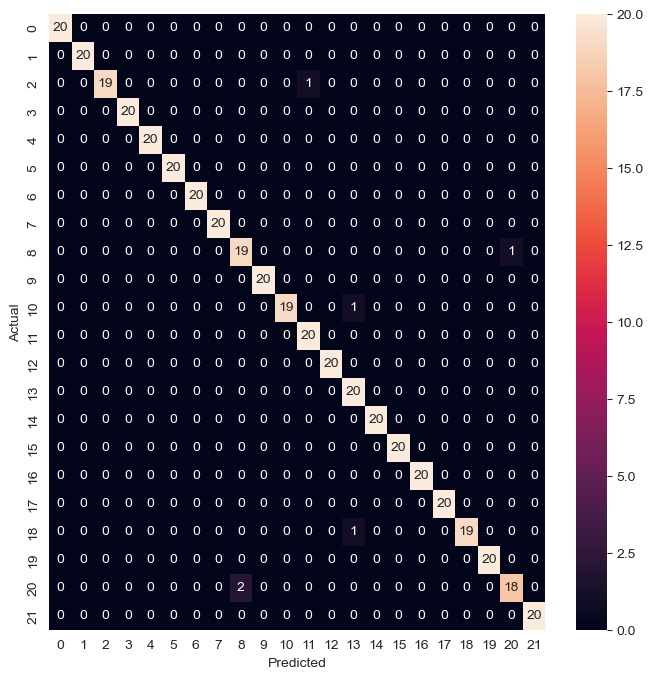

In [52]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc = RandomizedSearchCV(GradientBoostingClassifier(random_state = 42), param_grid, cv = 5)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
confusion_gbc = confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_gbc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
score(gbc, "Gradient Boosting Classifier")

Random Forest Classifier has the highest accuracy score.

## Conclusion

## Model Selected = Random Forest Classifier

In [53]:
names = data['label'].unique()

In [54]:
# Recommending top 3

def recommend(X):
    probability = rcv.predict_proba(X)
    probability = sorted( [(x,i) for (i,x) in enumerate(probability[0])], reverse=True)
    for i,j in probability[:3]:
        print(names[j])
recommend(X_test.sample(1))

watermelon
banana
coconut


In [55]:
# Saving Model

# Step 1 --- Scaling the data using (Scaler)
# Step 2 --- Applying the algorithm

import pickle
with open('AgricultureRecommendation','wb') as f:
    pickle.dump(rcv,f)
with open('Scaler','wb') as f:
    pickle.dump(scaler,f)